## El problema de la tierra en Colombia vista desde sus reformas agrarias

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import re
from collections import Counter

import nltk
from nltk import word_tokenize
from nltk.corpus import stopwords
%matplotlib inline
import matplotlib.pyplot as plt
import string

In [2]:
plt.rcParams["figure.figsize"] = [20.0, 12.0]

In [3]:
from nltk.book import *

*** Introductory Examples for the NLTK Book ***
Loading text1, ..., text9 and sent1, ..., sent9
Type the name of the text or sentence to view it.
Type: 'texts()' or 'sents()' to list the materials.
text1: Moby Dick by Herman Melville 1851
text2: Sense and Sensibility by Jane Austen 1811
text3: The Book of Genesis
text4: Inaugural Address Corpus
text5: Chat Corpus
text6: Monty Python and the Holy Grail
text7: Wall Street Journal
text8: Personals Corpus
text9: The Man Who Was Thursday by G . K . Chesterton 1908


In [4]:
import fitz # install using: 
from pathlib import Path

# Entender el problema agrario en Colombia

## ¿Qué se ha dicho al respecto?

In [5]:
# returns all file paths that has .pdf as extension in the specified directory
pdf_search_LIBROS = Path("LIBROS/").glob("*.pdf")
# convert the glob generator out put to list
# skip this if you are comfortable with generators and pathlib
pdf_files_LIBROS = [str(file.absolute()) for file in pdf_search_LIBROS]
pdf_files_LIBROS

['C:\\Users\\LENOVO\\Desktop\\ESTUDIO\\Maestría en Economía-UROSARIO\\Médotodos Computacionales para Políticas Públicas\\PROYECTO\\LIBROS\\La reforma Rural una deuda política y social.pdf',
 'C:\\Users\\LENOVO\\Desktop\\ESTUDIO\\Maestría en Economía-UROSARIO\\Médotodos Computacionales para Políticas Públicas\\PROYECTO\\LIBROS\\Marco conceptual, legal e institucional de la concentración y extranjerización de tierras productivas en Colomb.pdf']

In [6]:
LIBROS_1=[]

for pdf in pdf_files_LIBROS:
    with fitz.open(pdf) as doc:
        text = ""
        for page in doc:
            text += page.get_text()
        LIBROS_1.append(text)
print(LIBROS_1)

['EFORMA\nAbsalón Machado C\nUna \ndeuda \nsocial \ny politica\nUN IVERSIDAD\n• * ; NACIONAL\n%  1 J  \nDE COLOM BIA\nS E D E  \nB O G O T Á  \nFACULTAD DE C IEN C IA S EC O N Ó M ICA S\nCentro de \nInvestigaciones \npara el Desarrollo\nAbsalón Machado Cartagena\nEconomista de la Universidad \nde Antioquia, Profesor Titular de \nla Universidad Nacional de \nColombia.\nAutor de libros como: El café \nde la aparcería al capitalismo, \nTercer Mundo Editores; El sistema \nagroalimentario, coautor con \njorge Torres, Siglo XXI editores; La \ncuestión agraria en Colombia a \nfines del milenio, El Ancora Edito\xad\nres; Las organizaciones en el \nsector agropecuario, un análisis \ninstitucional, coautor con Henry \nSamacá, Colciencias, IICA. TM \neditores; Ensayos sobre seguri\xad\ndad alimentaria, Universidad Na\xad\ncional; De la estructura agraria al \nsistema agroindustrial, Universi\xad\ndad Nacional; Academia, actores \nsociales y políticas en el sector \nrural, coautor con Carlos Salga

In [7]:
# returns all file paths that has .pdf as extension in the specified directory
pdf_search_LIBROS2 = Path("LIBROS2/").glob("*.pdf")
# convert the glob generator out put to list
# skip this if you are comfortable with generators and pathlib
pdf_files_LIBROS2 = [str(file.absolute()) for file in pdf_search_LIBROS2]
pdf_files_LIBROS2

['C:\\Users\\LENOVO\\Desktop\\ESTUDIO\\Maestría en Economía-UROSARIO\\Médotodos Computacionales para Políticas Públicas\\PROYECTO\\LIBROS2\\Siervo sin tierra.pdf',
 'C:\\Users\\LENOVO\\Desktop\\ESTUDIO\\Maestría en Economía-UROSARIO\\Médotodos Computacionales para Políticas Públicas\\PROYECTO\\LIBROS2\\tierras-y-conflictos-rurales.pdf']

In [8]:
LIBROS_2=[]

for pdf in pdf_files_LIBROS2:
    with fitz.open(pdf) as doc:
        text = ""
        for page in doc:
            text += page.get_text()
        LIBROS_2.append(text)
print(LIBROS_2)

['EDUARDO\nCABALLERO\nCALDERÓN\nsiERvO\nsiN tiERRA\nEDUARDO\nCABALLERO\nCALDERÓN\nsiERvO\nsiN\ntiERRA\nCaballero Calderón, Eduardo, 1910-1993, autor\n \nSiervo sin tierra [recurso electrónico] / Eduardo Caballero Calderón [presentación, \nErna von der Walde]. – Bogotá : Ministerio de Cultura : Biblioteca Nacional de Colom-\nbia, 2016.\n \n1 recurso en línea : archivo de texto PDF (258 páginas). – (Biblioteca Básica de \nCultura Colombiana. Literatura / Biblioteca Nacional de Colombia)\n \n \nISBN 978-958-5419-00-1\n \n \n1. Novela colombiana - Siglo XX 2. Tenencia de la tierra – Boyacá - Novela 3. Libro \ndigital I. Von der Walde, Erna II. Título III. Serie\nCDD: Co863.44 ed. 23 \nCO-BoBN– a996063\nCatalogación en la publicación – Biblioteca Nacional de Colombia\nMariana Garcés Córdoba\nMINISTRA DE CULTURA\nZulia Mena García\nVICEMINISTRA DE CULTURA\nEnzo Rafael Ariza Ayala\nSECRETARIO GENERAL\nConsuelo Gaitán\nDIRECTORA DE LA BIBLIOTECA NACIONAL\nJavier Beltrán\nCOORDINADOR GENERAL\nJ

In [9]:
Fecha=[2009,2016]
Titulo=["La reforma Rural una deuda política y social","Concentración y extranjerización de tierras productivas en Colombia"]
Autores=["Absalón Machado","Organización de las Naciones Unidas para la Alimentación y la Agricultura"]
LIBROS1= pd.DataFrame(list(zip(Fecha,Titulo,LIBROS_1,Autores)),columns=["Fecha","Titulo","LIBRO","Autores"])
LIBROS1

Fecha                                             Titulo  \
0   2009       La reforma Rural una deuda política y social   
1   2016  Concentración y extranjerización de tierras pr...   

                                               LIBRO  \
0  EFORMA\nAbsalón Machado C\nUna \ndeuda \nsocia...   
1  Concentración y \nextranjerización de tierras ...   

                                             Autores  
0                                    Absalón Machado  
1  Organización de las Naciones Unidas para la Al...

In [510]:
Fecha=[1954,2016]
Titulo=["SIERVO SIN TIERRA","SIERVOS Y CONFLICTOS RURALES","Tierras y conflictos rurales Historia, políticas agrarias y protagonistas"]
Autores=["Caballero Calderón","Centro Nacional Memoria Histórica"]
LIBROS2= pd.DataFrame(list(zip(Fecha,Titulo,LIBROS_2,Autores)),columns=["Fecha","Titulo","LIBRO","Autores"])
LIBROS2

Fecha                        Titulo  \
0   1954             SIERVO SIN TIERRA   
1   2016  SIERVOS Y CONFLICTOS RURALES   

                                               LIBRO  \
0  EDUARDO\nCABALLERO\nCALDERÓN\nsiERvO\nsiN tiER...   
1  INFORME DEL CENTRO NACIONAL DE MEMORIA HISTÓRI...   

                             Autores  
0                 Caballero Calderón  
1  Centro Nacional Memoria Histórica

In [511]:
LIBROS=pd.concat([LIBROS1,LIBROS2])
LIBROS

Fecha                                             Titulo  \
0   2009       La reforma Rural una deuda política y social   
1   2016  Concentración y extranjerización de tierras pr...   
0   1954                                  SIERVO SIN TIERRA   
1   2016                       SIERVOS Y CONFLICTOS RURALES   

                                               LIBRO  \
0  EFORMA\nAbsalón Machado C\nUna \ndeuda \nsocia...   
1  Concentración y \nextranjerización de tierras ...   
0  EDUARDO\nCABALLERO\nCALDERÓN\nsiERvO\nsiN tiER...   
1  INFORME DEL CENTRO NACIONAL DE MEMORIA HISTÓRI...   

                                             Autores  
0                                    Absalón Machado  
1  Organización de las Naciones Unidas para la Al...  
0                                 Caballero Calderón  
1                  Centro Nacional Memoria Histórica

In [512]:
LIBROS=LIBROS.sort_values(by=['Fecha'])

In [513]:
def limpia_lineas(text):
    return re.sub("\n", "", text)

LIBROS['LIBRO']=LIBROS['LIBRO'].apply(limpia_lineas)
LIBROS

Fecha                                             Titulo  \
0   1954                                  SIERVO SIN TIERRA   
0   2009       La reforma Rural una deuda política y social   
1   2016  Concentración y extranjerización de tierras pr...   
1   2016                       SIERVOS Y CONFLICTOS RURALES   

                                               LIBRO  \
0  EDUARDOCABALLEROCALDERÓNsiERvOsiN tiERRAEDUARD...   
0  EFORMAAbsalón Machado CUna deuda social y poli...   
1  Concentración y extranjerización de tierras pr...   
1  INFORME DEL CENTRO NACIONAL DE MEMORIA HISTÓRI...   

                                             Autores  
0                                 Caballero Calderón  
0                                    Absalón Machado  
1  Organización de las Naciones Unidas para la Al...  
1                  Centro Nacional Memoria Histórica

In [514]:
def limpia_letras(text):
    return re.sub("\s\w\s", "", text)

LIBROS['LIBRO']=LIBROS['LIBRO'].apply(limpia_letras)
LIBROS

Fecha                                             Titulo  \
0   1954                                  SIERVO SIN TIERRA   
0   2009       La reforma Rural una deuda política y social   
1   2016  Concentración y extranjerización de tierras pr...   
1   2016                       SIERVOS Y CONFLICTOS RURALES   

                                               LIBRO  \
0  EDUARDOCABALLEROCALDERÓNsiERvOsiN tiERRAEDUARD...   
0  EFORMAAbsalón Machado CUna deuda socialpolitic...   
1  Concentraciónextranjerización de tierras produ...   
1  INFORME DEL CENTRO NACIONAL DE MEMORIA HISTÓRI...   

                                             Autores  
0                                 Caballero Calderón  
0                                    Absalón Machado  
1  Organización de las Naciones Unidas para la Al...  
1                  Centro Nacional Memoria Histórica

In [515]:
# Add additional relevant found characters to strip punctuation

punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation
# Strip punctuation from string

def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [516]:
LIBROS['LIBRO']=LIBROS['LIBRO'].apply(str.lower)

In [517]:
# Add column with no punctuation

LIBROS['Libro_no_punct'] = LIBROS['LIBRO'].apply(no_punct)
# Add column with speech column tokenized

LIBROS['tokens'] = LIBROS['Libro_no_punct'].apply(word_tokenize)
# Grab stopwords in Spanish

stopwords_esp = stopwords.words('spanish')
# Eliminate stopwords in Spanish

def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]
# Add column with speech column tokenized

LIBROS['no_stopwords'] = LIBROS['tokens'].apply(no_stopwords)
# Add column with nltk.Text object

LIBROS['nltk_Text'] = LIBROS['no_stopwords'].apply(nltk.Text)
LIBROS

Fecha                                             Titulo  \
0   1954                                  SIERVO SIN TIERRA   
0   2009       La reforma Rural una deuda política y social   
1   2016  Concentración y extranjerización de tierras pr...   
1   2016                       SIERVOS Y CONFLICTOS RURALES   

                                               LIBRO  \
0  eduardocaballerocalderónsiervosin tierraeduard...   
0  eformaabsalón machado cuna deuda socialpolitic...   
1  concentraciónextranjerización de tierras produ...   
1  informe del centro nacional de memoria históri...   

                                             Autores  \
0                                 Caballero Calderón   
0                                    Absalón Machado   
1  Organización de las Naciones Unidas para la Al...   
1                  Centro Nacional Memoria Histórica   

                                      Libro_no_punct  \
0  eduardocaballerocalderónsiervosin tierraeduard...   
0  eformaabsalón machado cuna deuda socialpolitic...   
1  concentraciónextranjerización de tierras produ...   
1  informe del centro nacional de memoria históri...   

                                              tokens  \
0  [eduardocaballerocalderónsiervosin, tierraedua...   
0  [eformaabsalón, machado, cuna, deuda, socialpo...   
1  [concentraciónextranjerización, de, tierras, p...   
1  [informe, del, centro, nacional, de, memoria, ...   

                                        no_stopwords  \
0  [eduardocaballerocalderónsiervosin, tierraedua...   
0  [eformaabsalón, machado, cuna, deuda, socialpo...   
1  [concentraciónextranjerización, tierras, produ...   
1  [informe, centro, nacional, memoria, histórica...   

                                           nltk_Text  
0  (eduardocaballerocalderónsiervosin, tierraedua...  
0  (eformaabsalón, machado, cuna, deuda, socialpo...  
1  (concentraciónextranjerización, tierras, produ...  
1  (informe, centro, nacional, memoria, histórica...

In [518]:
LIBROS = LIBROS.LIBRO.str.cat(sep=',')
all_tokens = LIBROS.split()
all_tokens

['eduardocaballerocalderónsiervosin',
 'tierraeduardocaballerocalderónsiervosintierracaballero',
 'calderón,',
 'eduardo,',
 '1910-1993,',
 'autor',
 'siervo',
 'sin',
 'tierra',
 '[recurso',
 'electrónico]',
 '/',
 'eduardo',
 'caballero',
 'calderón',
 '[presentación,',
 'erna',
 'von',
 'der',
 'walde].',
 '–',
 'bogotá',
 ':',
 'ministerio',
 'de',
 'cultura',
 ':',
 'biblioteca',
 'nacional',
 'de',
 'colom-bia,',
 '2016.recurso',
 'en',
 'línea',
 ':',
 'archivo',
 'de',
 'texto',
 'pdf',
 '(258',
 'páginas).',
 '–',
 '(biblioteca',
 'básica',
 'de',
 'cultura',
 'colombiana.',
 'literatura',
 '/',
 'biblioteca',
 'nacional',
 'de',
 'colombia)',
 'isbn',
 '978-958-5419-00-1',
 '1.',
 'novela',
 'colombiana',
 '-',
 'siglo',
 'xx',
 '2.',
 'tenencia',
 'de',
 'la',
 'tierra',
 '–',
 'boyacá',
 '-',
 'novela',
 '3.',
 'libro',
 'digital',
 'i.',
 'von',
 'der',
 'walde,',
 'erna',
 'ii.',
 'título',
 'iii.',
 'seriecdd:',
 'co863.44',
 'ed.',
 '23',
 'co-bobn–',
 'a996063catalogac

In [519]:
# Dejar caraceres alfabéticos
alpha = [w for w in all_tokens if w.isalpha()]
alpha

['eduardocaballerocalderónsiervosin',
 'tierraeduardocaballerocalderónsiervosintierracaballero',
 'autor',
 'siervo',
 'sin',
 'tierra',
 'eduardo',
 'caballero',
 'calderón',
 'erna',
 'von',
 'der',
 'bogotá',
 'ministerio',
 'de',
 'cultura',
 'biblioteca',
 'nacional',
 'de',
 'en',
 'línea',
 'archivo',
 'de',
 'texto',
 'pdf',
 'básica',
 'de',
 'cultura',
 'literatura',
 'biblioteca',
 'nacional',
 'de',
 'isbn',
 'novela',
 'colombiana',
 'siglo',
 'xx',
 'tenencia',
 'de',
 'la',
 'tierra',
 'boyacá',
 'novela',
 'libro',
 'digital',
 'von',
 'der',
 'erna',
 'título',
 'en',
 'la',
 'publicación',
 'biblioteca',
 'nacional',
 'de',
 'colombiamariana',
 'garcés',
 'córdobaministra',
 'de',
 'culturazulia',
 'mena',
 'garcíaviceministra',
 'de',
 'culturaenzo',
 'rafael',
 'ariza',
 'ayalasecretario',
 'generalconsuelo',
 'gaitándirectora',
 'de',
 'la',
 'biblioteca',
 'nacionaljavier',
 'beltráncoordinador',
 'generaljesús',
 'goyenecheasistente',
 'editorialde',
 'investigac

In [520]:
# Grab punctuation characters

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [521]:
# Add additional relevant found characters to strip punctuation

punctuation = string.punctuation + '–¡¿”“•\r´'

In [522]:
def no_punct(text):
    '''
    Elimina signos de puntuación y otros caracteres indeseados
    '''
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´]+', '', text)

In [523]:
tokens_no_punc = list(map(no_punct, all_tokens))
tokens_no_punc

['eduardocaballerocalderónsiervosin',
 'tierraeduardocaballerocalderónsiervosintierracaballero',
 'calderón',
 'eduardo',
 '19101993',
 'autor',
 'siervo',
 'sin',
 'tierra',
 'recurso',
 'electrónico',
 '',
 'eduardo',
 'caballero',
 'calderón',
 'presentación',
 'erna',
 'von',
 'der',
 'walde',
 '',
 'bogotá',
 '',
 'ministerio',
 'de',
 'cultura',
 '',
 'biblioteca',
 'nacional',
 'de',
 'colombia',
 '2016recurso',
 'en',
 'línea',
 '',
 'archivo',
 'de',
 'texto',
 'pdf',
 '258',
 'páginas',
 '',
 'biblioteca',
 'básica',
 'de',
 'cultura',
 'colombiana',
 'literatura',
 '',
 'biblioteca',
 'nacional',
 'de',
 'colombia',
 'isbn',
 '9789585419001',
 '1',
 'novela',
 'colombiana',
 '',
 'siglo',
 'xx',
 '2',
 'tenencia',
 'de',
 'la',
 'tierra',
 '',
 'boyacá',
 '',
 'novela',
 '3',
 'libro',
 'digital',
 'i',
 'von',
 'der',
 'walde',
 'erna',
 'ii',
 'título',
 'iii',
 'seriecdd',
 'co86344',
 'ed',
 '23',
 'cobobn',
 'a996063catalogación',
 'en',
 'la',
 'publicación',
 '',
 'bi

In [524]:
#Grab stopwords in Spanish
stopwords_esp = stopwords.words('spanish')
stopwords_esp

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [525]:
tokens_no_stop = [w for w in alpha if w not in stopwords_esp]
tokens_no_stop

['eduardocaballerocalderónsiervosin',
 'tierraeduardocaballerocalderónsiervosintierracaballero',
 'autor',
 'siervo',
 'tierra',
 'eduardo',
 'caballero',
 'calderón',
 'erna',
 'von',
 'der',
 'bogotá',
 'ministerio',
 'cultura',
 'biblioteca',
 'nacional',
 'línea',
 'archivo',
 'texto',
 'pdf',
 'básica',
 'cultura',
 'literatura',
 'biblioteca',
 'nacional',
 'isbn',
 'novela',
 'colombiana',
 'siglo',
 'xx',
 'tenencia',
 'tierra',
 'boyacá',
 'novela',
 'libro',
 'digital',
 'von',
 'der',
 'erna',
 'título',
 'publicación',
 'biblioteca',
 'nacional',
 'colombiamariana',
 'garcés',
 'córdobaministra',
 'culturazulia',
 'mena',
 'garcíaviceministra',
 'culturaenzo',
 'rafael',
 'ariza',
 'ayalasecretario',
 'generalconsuelo',
 'gaitándirectora',
 'biblioteca',
 'nacionaljavier',
 'beltráncoordinador',
 'generaljesús',
 'goyenecheasistente',
 'editorialde',
 'investigaciónsandra',
 'angulocoordinadora',
 'grupo',
 'conservaciónpaola',
 'caballeroresponsable',
 'alianzastalia',
 'm

In [526]:
freqdist = nltk.FreqDist(tokens_no_stop)
freqdist.most_common()

[('tierras', 1250),
 ('propiedad', 864),
 ('reforma', 728),
 ('agraria', 662),
 ('tierra', 648),
 ('desarrollo', 643),
 ('políticas', 608),
 ('ley', 597),
 ('nacional', 565),
 ('rural', 562),
 ('derechos', 541),
 ('predios', 491),
 ('sector', 478),
 ('baldíos', 462),
 ('parte', 449),
 ('página', 433),
 ('política', 424),
 ('ciento', 406),
 ('uso', 396),
 ('años', 381),
 ('colombia', 381),
 ('zonas', 381),
 ('si', 372),
 ('mercado', 359),
 ('según', 355),
 ('dos', 323),
 ('conflicto', 317),
 ('puede', 316),
 ('información', 310),
 ('caso', 301),
 ('cultivos', 293),
 ('ser', 292),
 ('sido', 292),
 ('proceso', 291),
 ('así', 281),
 ('concentración', 280),
 ('estructura', 273),
 ('análisis', 271),
 ('mayor', 260),
 ('relación', 253),
 ('grandes', 250),
 ('área', 250),
 ('sino', 247),
 ('solo', 247),
 ('hectáreas', 244),
 ('don', 235),
 ('distribución', 235),
 ('adjudicación', 233),
 ('rurales', 227),
 ('cuenta', 226),
 ('producción', 224),
 ('base', 222),
 ('procesos', 220),
 ('gobierno', 

In [527]:
# From inspection of frequency distribution, make list of words of interest

not_of_interest = ['eduardo','eduardo','calderón','página', 'parte', 'ley', 'ciento', 'si', 'dos','según','puede','ser','así','sido','mayor','don','vez','ción']

In [528]:
# Filter list of all tokens based on list of words of interst

tokens_of_interest = [w for w in alpha if w not in not_of_interest]
tokens_of_interest = [w for w in tokens_of_interest if w not in stopwords_esp]

tokens_of_interest

['eduardocaballerocalderónsiervosin',
 'tierraeduardocaballerocalderónsiervosintierracaballero',
 'autor',
 'siervo',
 'tierra',
 'caballero',
 'erna',
 'von',
 'der',
 'bogotá',
 'ministerio',
 'cultura',
 'biblioteca',
 'nacional',
 'línea',
 'archivo',
 'texto',
 'pdf',
 'básica',
 'cultura',
 'literatura',
 'biblioteca',
 'nacional',
 'isbn',
 'novela',
 'colombiana',
 'siglo',
 'xx',
 'tenencia',
 'tierra',
 'boyacá',
 'novela',
 'libro',
 'digital',
 'von',
 'der',
 'erna',
 'título',
 'publicación',
 'biblioteca',
 'nacional',
 'colombiamariana',
 'garcés',
 'córdobaministra',
 'culturazulia',
 'mena',
 'garcíaviceministra',
 'culturaenzo',
 'rafael',
 'ariza',
 'ayalasecretario',
 'generalconsuelo',
 'gaitándirectora',
 'biblioteca',
 'nacionaljavier',
 'beltráncoordinador',
 'generaljesús',
 'goyenecheasistente',
 'editorialde',
 'investigaciónsandra',
 'angulocoordinadora',
 'grupo',
 'conservaciónpaola',
 'caballeroresponsable',
 'alianzastalia',
 'méndezproyectos',
 'digita

In [529]:
of_interest = ['latifundista','latifundistas','concentración','impuestos','distribución','terrateniente','terratenientes',\
               'conflicto','conflictos','armado','frontera','agrícola','fronteraagrícola','informalidad','campesino',\
               'campesinos','violencia','acceso','propiedad','ocupación','ilegal','tenencia','extranjerización','desplazado',\
              'desplazados','ilegal','privado','público','instituto','derecho','agraria','propiedad','privado','privada','público',\
               'incora','predio','propietario','dominio','propietarios','índigenas','campesinos','igualdad','desigualdad',\
              'violación','terrenos','terreno','amortización','victima','victimas','violencia','conflicto','armado','extinción',\
              'expropiación','gobierno','agricultura','agraria','tierras','explotados','instituciones','institución','transformación',\
              "agricultura",'ganadería','seguridad','educación','pobreza','desarrollo','empleo','trabajo','recursos','vida','social','inversión',\
 'equidad','tierra','redistribución','reforma','baldíos','posesión','plantaciones','ocupación','aprovechamiento','ganadería',\
 'explotación']

In [530]:
# Filter list of all tokens based on list of words of interest

tokens_of_interest = [w for w in all_tokens if w in of_interest]

In [531]:
# Join list in string

tokens_of_interest_str = ' '.join(tokens_of_interest)

In [532]:
with open('wordcloud/tokens_of_interest_str2.txt',mode='w', encoding= 'utf-8') as f:
    f.write(tokens_of_interest_str)

In [533]:
freqdist = nltk.FreqDist(tokens_of_interest)
freqdist.most_common()

[('tierras', 1250),
 ('propiedad', 864),
 ('reforma', 728),
 ('agraria', 662),
 ('tierra', 648),
 ('desarrollo', 643),
 ('baldíos', 462),
 ('conflicto', 317),
 ('concentración', 280),
 ('distribución', 235),
 ('gobierno', 212),
 ('campesinos', 210),
 ('agricultura', 209),
 ('tenencia', 201),
 ('social', 189),
 ('recursos', 168),
 ('derecho', 159),
 ('terrenos', 155),
 ('seguridad', 149),
 ('conflictos', 148),
 ('dominio', 145),
 ('explotación', 130),
 ('propietarios', 130),
 ('incora', 130),
 ('privada', 126),
 ('inversión', 122),
 ('instituto', 120),
 ('agrícola', 117),
 ('trabajo', 113),
 ('vida', 111),
 ('armado', 88),
 ('violencia', 87),
 ('ganadería', 84),
 ('predio', 66),
 ('acceso', 64),
 ('frontera', 60),
 ('terreno', 50),
 ('transformación', 47),
 ('público', 47),
 ('redistribución', 47),
 ('campesino', 45),
 ('posesión', 40),
 ('ocupación', 38),
 ('informalidad', 38),
 ('desigualdad', 36),
 ('pobreza', 36),
 ('extinción', 36),
 ('desplazados', 35),
 ('instituciones', 35),
 ('

In [534]:
fre_map=freqdist.most_common()[0:20]
d_map=pd.DataFrame(fre_map)
d_map.columns=['Palabra','frecuencia']
d_map

Palabra  frecuencia
0         tierras        1250
1       propiedad         864
2         reforma         728
3         agraria         662
4          tierra         648
5      desarrollo         643
6         baldíos         462
7       conflicto         317
8   concentración         280
9    distribución         235
10       gobierno         212
11     campesinos         210
12    agricultura         209
13       tenencia         201
14         social         189
15       recursos         168
16        derecho         159
17       terrenos         155
18      seguridad         149
19     conflictos         148

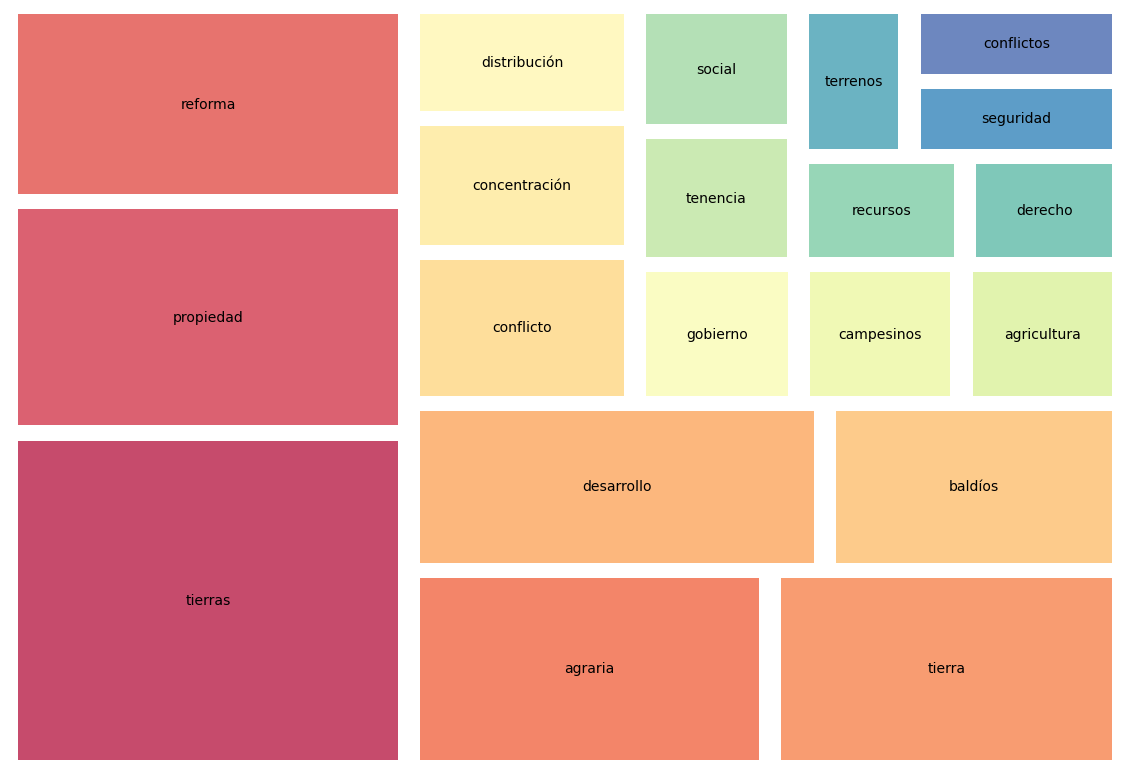

In [535]:
import squarify    # pip install squarify (algorithm for treemap)

squarify.plot(sizes=d_map['frecuencia'], label=d_map['Palabra'], alpha=.8,
              color=sns.color_palette("Spectral", 
                                     len(d_map)),pad=2,text_kwargs={'fontsize': 14})
plt.axis('off')
plt.show()

In [536]:
# Si queremos aplicar métodos de objetos nltk.text.Text:
tokens_nltk = nltk.Text(tokens_of_interest)
tokens_nltk

<Text: tierra tenencia tierra conflicto conflictos tierra tierra tierra...>

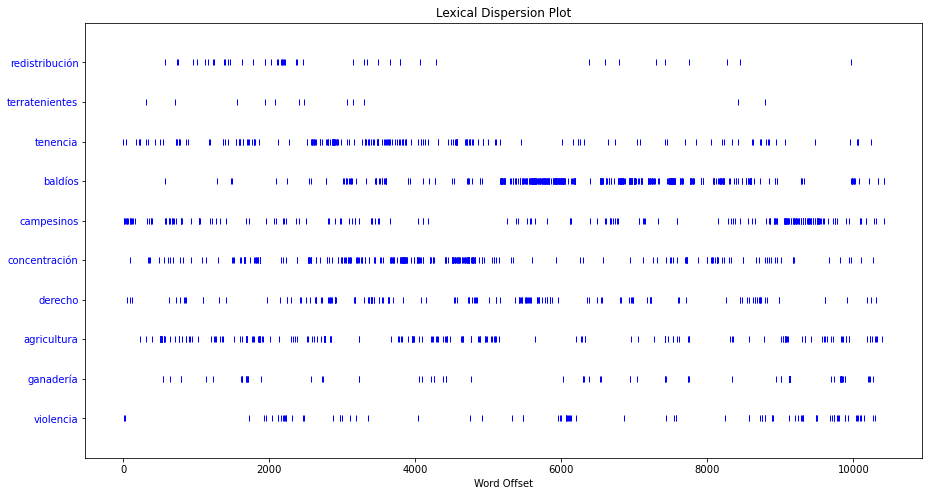

In [541]:
plt.rcParams["figure.figsize"] = [15.0, 8.0]
tokens_nltk.dispersion_plot(["redistribución", "terratenientes","tenencia","baldíos","campesinos","concentración",\
                            "derecho",'agricultura','ganadería','violencia'])

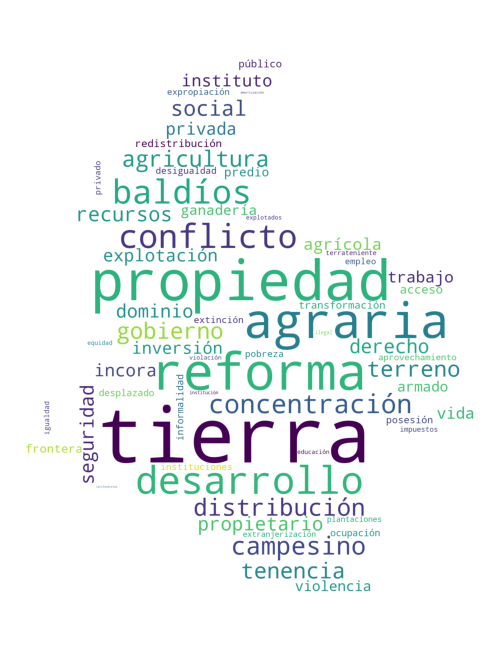

<Figure size 1440x864 with 0 Axes>

In [542]:
# Based on https://github.com/amueller/word_cloud/blob/master/examples/masked.py
# Word cloud requirements
plt.rcParams["figure.figsize"] = [20.0, 12.0]
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

d = path.dirname('C:/Users/LENOVO/Desktop/ESTUDIO/Maestría en Economía-UROSARIO/Médotodos Computacionales para Políticas Públicas/PROYECTO/wordcloud/tokens_of_interest_str2.txt')

# Read the whole text
text = open(path.join(d, 'tokens_of_interest_str2.txt'),mode='r', encoding='utf-8').read()

# Read the mask image
# taken from http://www.zonu.com/images/0X0/2011-08-16-14306/Colombia-outline-map.jpg
colombia_mask = np.array(Image.open(path.join(d, "colombia.png")))

wc = WordCloud(background_color="white", max_words=500, mask=colombia_mask,collocations=False).generate(text)

# Generate word cloud
wc.generate(text)

# Store to file
wc.to_file(path.join(d, "wordcloud_libro.png"))

# Show

plt.imshow(wc)
plt.axis("off")
plt.figure()
#plt.imshow(colombia_mask, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()

In [37]:
def col_counter(list_of_words, word):
    counter = Counter(w for w in list_of_words if w in word)
    return counter[word]


# Análisis de datos

In [93]:
victimas=pd.read_csv("bases/victimas.csv")
victimas

Cod Depto     Departamento Cod en texto     Municipio  \
0           5.0        Antioquia         05001     Medellín   
1           5.0        Antioquia         05002    Abejorral   
2           5.0        Antioquia         05004     Abriaquí   
3           5.0        Antioquia         05021   Alejandría   
4           5.0        Antioquia         05030        Amagá   
...         ...              ...           ...          ...   
1118       76.0  Valle del Cauca         76863    Versalles   
1119       76.0  Valle del Cauca         76869        Vijes   
1120       76.0  Valle del Cauca         76890       Yotoco   
1121       76.0  Valle del Cauca         76892        Yumbo   
1122       76.0  Valle del Cauca         76895       Zarzal   

     Dirección Territorial          Director Territorial   \
0                 Antioquia  Jorge Mario Alzate Maldonado   
1                 Antioquia  Jorge Mario Alzate Maldonado   
2                 Antioquia  Jorge Mario Alzate Maldonado   
3                 Antioquia  Jorge Mario Alzate Maldonado   
4                 Antioquia  Jorge Mario Alzate Maldonado   
...                     ...                           ...   
1118                  Valle       Fabiola Perdomo Estrada   
1119                  Valle       Fabiola Perdomo Estrada   
1120                  Valle       Fabiola Perdomo Estrada   
1121                  Valle       Fabiola Perdomo Estrada   
1122                  Valle       Fabiola Perdomo Estrada   

                                Alcalde  Población 2017  \
0     Federico Andres Gutierrez Zuluaga         2508452   
1       Mario De Jesús Gutiérrez Guzmán           19096   
2            Jhon Fredy López Sepúlveda            2019   
3             Luis Fernando López Pérez            3393   
4            Wilser Darío Molina Molina           29980   
...                                 ...             ...   
1118        Diego Fernando Mejía Millán            7017   
1119     Diana Carolina Castaño Londoño           11276   
1120        Nubiola Aristizabal Castaño           16418   
1121   Carlos Alberto Bejarano Castillo          122762   
1122                    Luz Elena López           46140   

      No. Víctimas por Declaración  No. Sujetos Atención   ...  \
0                           649555                 507975  ...   
1                             4775                   4137  ...   
2                             1511                   1186  ...   
3                             5286                   4342  ...   
4                             1762                   1213  ...   
...                            ...                    ...  ...   
1118                           394                    311  ...   
1119                           428                    344  ...   
1120                          1633                   1085  ...   
1121                          8782                   6996  ...   
1122                          2440                   1844  ...   

      SRC en Valoración  SRC Incluido  DEVOLUCION MP   SRC No Incluido  \
0                     0             3               0                0   
1                     0             0               0                0   
2                     0             0               0                0   
3                     0             1               0                0   
4                     0             0               0                0   
...                 ...           ...             ...              ...   
1118                  0             1               0                0   
1119                  0             0               0                0   
1120                  0             0               0                0   
1121                  0             0               0                0   
1122                  0             0               0                0   

      SRC Indentificados  Apoyo a Entes Territoriales  \
0                      4                          823   
1          

In [94]:
desplazamiento=pd.read_csv("bases/desplazamientoforzado.csv")
desplazamiento

OBJECTID  Codigo_Muniicipio Departamento       Municipio  \
0            1               5001    ANTIOQUIA        MEDELLÍN   
1            2               5002    ANTIOQUIA       ABEJORRAL   
2            3               5004    ANTIOQUIA        ABRIAQUÍ   
3            4               5021    ANTIOQUIA      ALEJANDRÍA   
4            5               5030    ANTIOQUIA           AMAGÁ   
...        ...                ...          ...             ...   
1116      1117              97889       VAUPÉS        YAVARATÉ   
1117      1118              99624      VICHADA   SANTA ROSALÍA   
1118      1119              99001      VICHADA  PUERTO CARREÑO   
1119      1120              99524      VICHADA    LA PRIMAVERA   
1120      1121              99773      VICHADA        CUMARIBO   

      Periodo_1980_1988  Periodo_1989_1996  Periodo_1997_2004  \
0                   412               4662              23268   
1                    46                296               6494   
2                    74                229                987   
3                    10                116               4997   
4                    20                130                670   
...                 ...                ...                ...   
1116                  0                  0                  0   
1117                  6                 29                324   
1118                  2                 39                828   
1119                 17                113                710   
1120                 37                260               2537   

      Periodo_2005_2014                                        Descripcion  \
0                 81738  Desplazamiento forzado histórico por municipio...   
1                  2030  Desplazamiento forzado histórico por municipio...   
2                   129  Desplazamiento forzado histórico por municipio...   
3                   368  Desplazamiento forzado histórico por municipio...   
4                   787  Desplazamiento forzado histórico por municipio...   
...                 ...                                                ...   
1116                 27  Desplazamiento forzado histórico por municipio...   
1117                349  Desplazamiento forzado histórico por municipio...   
1118               1078  Desplazamiento forzado histórico por municipio...   
1119               1152  Desplazamiento forzado histórico por municipio...   
1120              11794  Desplazamiento forzado histórico por municipio...   

        Periodo                                             Fuente  \
0     1980-2014  Elaboración propia del CNMH. Información geogr...   
1     1980-2014  Elaboración propia del CNMH. Información geogr...   
2     1980-2014  Elaboración propia del CNMH. Información geogr...   
3     1980-2014  Elaboración propia del CNMH. Información geogr...   
4     1980-2014  Elaboración propia del CNMH. Información geogr...   
...         ...                                                ...   
1116  1980-2014  Elaboración propia del CNMH. Información geogr...   
1117  1980-2014  Elaboración propia del CNMH. Información geogr...   
1118  1980-2014  Elaboración propia del CNMH. Información geogr...   
1119  1980-2014  Elaboración propia del CNMH. Información geogr...   
1120  1980-2014  Elaboración propia del CNMH. Información geogr...   

         Fecha_Actualizacion  Total_1989_2014  Shape_Length  Shape_Area  
0     2021/09/22 00:00:00+00           110080      1.032546    0.030606  
1     2021/09/22 00:00:00+00             8866      1.158504    0.041384  
2     2021/09/22 00:00:00+00             1419      0.812183    0.024248  
3     2021/09/22 00:00:00+00             5491      0.705200    0.010535  
4     2021/09/22 00:00:00+00             1607      0.445241    0.006867  
...                      ...              ...           ...         ...  
1116  2021/09/22 00:00:00+00               27      3.970046    0.376344  
1117  2021/09/22 00:00:00+00              708      3.805847   

In [508]:
violencia=pd.read_csv("bases/violencia.csv")
violencia['Ano'].unique()

violencia_1991=violencia.loc[violencia['Ano']==1991]
violencia_1996=violencia.loc[violencia['Ano']==1996]
violencia_2001=violencia.loc[violencia['Ano']==2001]
violencia_2006=violencia.loc[violencia['Ano']==2006]
violencia_2011=violencia.loc[violencia['Ano']==2011]
violencia_2016=violencia.loc[violencia['Ano']==2016]
violencia_2021=violencia.loc[violencia['Ano']==2021]
violencia_2021

ID Caso ID Caso Relacionado   Ano  Mes  Dia  Codigo DANE de Municipio  \
68508   608323                 NaN  2021    1   23                      5647   
68519   628462                 NaN  2021    2   16                     52835   
68520   628465                 NaN  2021    3   25                     23807   
68546   648991                 NaN  2021    6   25                     73067   
68547   648998                 NaN  2021    5   22                     17088   
68550   649104                 NaN  2021    8    7                     81001   
68554   649266                 NaN  2021    1   30                     52621   
68555   649278                 NaN  2021    2    0                     19256   
68564   680014        CR2017679985  2021    7   13                     52621   
68569   700609        CR2017700608  2021    1   14                     95015   

                    Municipio Departamento              Region  \
68508  SAN ANDRES DE CUERQUIA    ANTIOQUIA  NORTE DE ANTIOQUIA   
68519    SAN ANDRES DE TUMACO       NARIÑO  ANDEN PACIFICO SUR   
68520               TIERRALTA      CORDOBA               URABA   
68546                   ATACO       TOLIMA      SUR DEL TOLIMA   
68547              BELALCAZAR       CALDAS        EJE CAFETERO   
68550                  ARAUCA       ARAUCA   LLANOS ORIENTALES   
68554           ROBERTO PAYAN       NARIÑO  ANDEN PACIFICO SUR   
68555                EL TAMBO        CAUCA     NORTE DEL CAUCA   
68564           ROBERTO PAYAN       NARIÑO  ANDEN PACIFICO SUR   
68569                 CALAMAR     GUAVIARE    ARIARI GUAYABERO   

                 Modalidad  ... Desplazamiento Forzado Extorsion  \
68508       INTERCEPTACIÓN  ...                      0         0   
68519  RETENCIÓN/EJECUCIÓN  ...                      0         0   
68520          DESCONOCIDA  ...                      0         0   
68546  RETENCIÓN/EJECUCIÓN  ...                      0         0   
68547          DESCONOCIDA  ...                      0         0   
68550          DESCONOCIDA  ...                      0         0   
68554                RETÉN  ...                      0         0   
68555          DESCONOCIDA  ...                      0         0   
68564          DESCONOCIDA  ...                      0         0   
68569               ASALTO  ...                      1         0   

       Lesionados Civiles  Pillaje  Tortura  Violencia Basada en Genero  \
68508                   0        0        1                         NaN   
68519                   0        0        2                         NaN   
68520                   0        0        1                         NaN   
68546                   0        0        0                         NaN   
68547                   0        0        0                         NaN   
68550                   0        0        0                         NaN   
68554                   0        0        0                         NaN   
68555                   0        0        0                         NaN   
68564                   0        0        0                         NaN   
68569                   0        0        1                         NaN   

         Otro Hecho Simultáneo  Total de Víctimas del Caso  \
68508                      NaN                           1   
68519                      NaN                           2   
68520                      NaN                           1   
68546                      NaN                           1   
68547                      NaN                           1   
68550  OCULTAMIENTO DE CADÁVER                           1   
68554                      NaN                           6   
68555                      NaN                           2   
68564            ACCIÓN BÉLICA                           1   
68569                      NaN                           1   

             Tipo de Armas                     latitud-longitud  
68508                   ND  POINT (-75.6747325261 6.9168085123)  
68519    

In [499]:
restitucion=pd.read_csv("bases/restitución.csv")
restitucion

DepartamentoDelPredio MunicipioDelPredio  CodigoDANE  \
0                Santander         San Benito       68673   
1                   Nariño          Chachagüí       52240   
2                Santander           Rionegro       68615   
3                   Nariño           Ricaurte       52612   
4             Cundinamarca           Silvania       25743   
...                    ...                ...         ...   
1016                 Sucre             Ovejas       70508   
1017                 Cesar        Tamalameque       20787   
1018                  Meta        Puerto Rico       50590   
1019               Córdoba       Planeta Rica       23555   
1020             Antioquia              Urrao        5847   

      NumeroDeSolicitudes  NumeroDePredios  NumeroDeTitulares  
0                       2                2                  2  
1                       5                5                  5  
2                     290              279                228  
3                     121              104                 83  
4                      87               81                 59  
...                   ...              ...                ...  
1016                  963              725                819  
1017                  187              172                137  
1018                  765              709                649  
1019                   50               48                 38  
1020                  236              221                165  

[1021 rows x 6 columns]

# ¿Que han abordado las reformas agrarias en Colombia?

In [38]:
# returns all file paths that has .pdf as extension in the specified directory
pdf_search = Path("REFORMAS/").glob("*.pdf")
# convert the glob generator out put to list
# skip this if you are comfortable with generators and pathlib
pdf_files = [str(file.absolute()) for file in pdf_search]

In [39]:
pdf_files

['C:\\Users\\LENOVO\\Desktop\\ESTUDIO\\Maestría en Economía-UROSARIO\\Médotodos Computacionales para Políticas Públicas\\PROYECTO\\REFORMAS\\ACUERDO CON GANADEROS.pdf',
 'C:\\Users\\LENOVO\\Desktop\\ESTUDIO\\Maestría en Economía-UROSARIO\\Médotodos Computacionales para Políticas Públicas\\PROYECTO\\REFORMAS\\LEY 1 DE 1968.pdf',
 'C:\\Users\\LENOVO\\Desktop\\ESTUDIO\\Maestría en Economía-UROSARIO\\Médotodos Computacionales para Políticas Públicas\\PROYECTO\\REFORMAS\\LEY 100 DE 1944.pdf',
 'C:\\Users\\LENOVO\\Desktop\\ESTUDIO\\Maestría en Economía-UROSARIO\\Médotodos Computacionales para Políticas Públicas\\PROYECTO\\REFORMAS\\Ley 135 de 1961.pdf',
 'C:\\Users\\LENOVO\\Desktop\\ESTUDIO\\Maestría en Economía-UROSARIO\\Médotodos Computacionales para Políticas Públicas\\PROYECTO\\REFORMAS\\Ley 160 de 1994.pdf',
 'C:\\Users\\LENOVO\\Desktop\\ESTUDIO\\Maestría en Economía-UROSARIO\\Médotodos Computacionales para Políticas Públicas\\PROYECTO\\REFORMAS\\LEY 200 DE 1936.pdf',
 'C:\\Users\\LENOV

In [40]:
PDFs=[]

for pdf in pdf_files:
    with fitz.open(pdf) as doc:
        text = ""
        for page in doc:
            text += page.get_text()
        PDFs.append(text)
#print(PDFs)

In [324]:
Fecha=[2022,1968,1944,1961,1994,1936,1988,1982,1973,1992,1975,2017]
Titulo=["ACUERDO PARA LA MATERIALIZACIÓN DE LA PAZ TERRITORIAL","LEY 1 DE 1968","LEY 100 DE 1944","LEY 135 DE 1961","LEY 160 DE 1994","LEY 200 DE 1936","LEY 30 DE 1988",
        "LEY 35 DE 1982","LEY 4 DE 1973","LEY 5 DE 1992","LEY 6 DE 1975","LEY 902 DE 2017"]
Reformas= pd.DataFrame(list(zip(Fecha,Titulo,PDFs)),columns=["Fecha","Titulo","Reforma"])

In [543]:
Reformas=Reformas.sort_values(by=['Fecha'])
Reformas=Reformas.reset_index(drop=True)
Reformas

Fecha                                             Titulo  \
0    1936                                    LEY 200 DE 1936   
1    1944                                    LEY 100 DE 1944   
2    1961                                    LEY 135 DE 1961   
3    1968                                      LEY 1 DE 1968   
4    1973                                      LEY 4 DE 1973   
5    1975                                      LEY 6 DE 1975   
6    1982                                     LEY 35 DE 1982   
7    1988                                     LEY 30 DE 1988   
8    1992                                      LEY 5 DE 1992   
9    1994                                    LEY 160 DE 1994   
10   2017                                    LEY 902 DE 2017   
11   2022  ACUERDO PARA LA MATERIALIZACIÓN DE LA PAZ TERR...   

                                              Reforma  \
0   21/11/22, 9:37 ley 200 de 1936 https://www.sui...   
1   21/11/22, 9:38 ley 100 de 1944 https://www.sui...   
2   departamento administrativo de la función públ...   
3   21/11/22, 9:40 ley 1 de 1968 https://www.suin-...   
4   departamento administrativo de la función públ...   
5   21/11/22, 11:11 ley 6 de 1975 https://www.suin...   
6   21/11/22, 11:12 ley 35 de 1982 https://www.sui...   
7   21/11/22, 11:12 ley 30 de 1988 https://www.sui...   
8   departamento administrativo de la función públ...   
9   departamento administrativo de la función públ...   
10  departamento administrativo de la función públ...   
11  acuerdo para la materialización de la paz terr...   

                                       Reforma_limpia  \
0   decreta:     capítuloartículo 1o.     se presu...   
1   decreta:     articulo 1° declárase de convenie...   
2   decreta:   capítulo i.   objeto de esta ley   ...   
3   decreta:     artículo 1º introdúcense al texto...   
4   decreta:   artículo  1º. derogado por el artíc...   
5   decreta:     artículo 1º. la aparcería es un c...   
6   decreta:     articulo 1º. concédese amnistía g...   
7   decreta:     artículo 1º. los ordinales 2º, 5º...   
8   decreta: disposiciones preliminares art&iacute...   
9   decreta:   capítulo  objeto de la ley   artícu...   
10  decreta:   artículo 1°. objeto. el presente de...   
11  acuerdo para la materialización de la paz terr...   

                                     Reforma_no_punct  \
0   decreta:     capítulo 1o.     se presume que n...   
1   decreta:     articulo 1° declárase de convenie...   
2   decreta:   capítulo i.   objeto de esta      1...   
3   decreta:      1º introdúcense al texto de la  ...   
4   decreta:     1º. derogado por el  111 de la  1...   
5   decreta:      1º. la aparcería es un contrato ...   
6   decreta:     articulo 1º. concédese amnistía l...   
7   decreta:      1º. los ordinales 2º, 5º7º del  ...   
8   decreta: dispociones preliminares art&iacutecu...   
9   decreta:   capítulo  objeto de la     1°. insp...   
10  decreta:    1°. objeto. el  decreto tiene por ...   
11  acuerdo para la materialización de la paz terr...   

                                               tokens  \
0   [decreta, :, capítulo, 1o, ., se, presume, que...   
1   [decreta, :, articulo, 1°, declárase, de, conv...   
2   [decreta, :, capítulo, i., objeto, de, esta, 1...   
3   [decreta, :, 1º, introdúcense, al, texto, de, ...   
4   [decreta, :, 1º, ., derogado, por, el, 111, de...   
5   [decreta, :, 1º, ., la, aparcería, es, un, con...   
6   [decreta, :, articulo, 1º, ., concédese, amnis...   
7   [decreta, :, 1º, ., los, ordinales, 2º, ,, 5º7...   
8   [decreta, :, dispociones, preliminares, art, &...   
9   [decreta, :, capítulo, objeto, de, la, 1°, ., ...   
10  [decreta, :, 1°, ., objeto, ., el, decreto, ti...   
11  [acuerdo, para, la, materialización, de, la, p...   

                                         no_stopwords  \
0   [decreta, :, capítulo, 1o, ., presume, baldíos...   
1   [decreta, :, articulo, 1°, declárase, convenie...   
2   [decreta, :, capítulo, i., o

In [544]:
Reformas['Reforma'] = Reformas['Reforma'].apply(str.lower)

In [545]:
def limpia_lineas(text):
    return re.sub("\n", " ", text)

Reformas['Reforma']=Reformas['Reforma'].apply(limpia_lineas)
Reformas

Fecha                                             Titulo  \
0    1936                                    LEY 200 DE 1936   
1    1944                                    LEY 100 DE 1944   
2    1961                                    LEY 135 DE 1961   
3    1968                                      LEY 1 DE 1968   
4    1973                                      LEY 4 DE 1973   
5    1975                                      LEY 6 DE 1975   
6    1982                                     LEY 35 DE 1982   
7    1988                                     LEY 30 DE 1988   
8    1992                                      LEY 5 DE 1992   
9    1994                                    LEY 160 DE 1994   
10   2017                                    LEY 902 DE 2017   
11   2022  ACUERDO PARA LA MATERIALIZACIÓN DE LA PAZ TERR...   

                                              Reforma  \
0   21/11/22, 9:37 ley 200 de 1936 https://www.sui...   
1   21/11/22, 9:38 ley 100 de 1944 https://www.sui...   
2   departamento administrativo de la función públ...   
3   21/11/22, 9:40 ley 1 de 1968 https://www.suin-...   
4   departamento administrativo de la función públ...   
5   21/11/22, 11:11 ley 6 de 1975 https://www.suin...   
6   21/11/22, 11:12 ley 35 de 1982 https://www.sui...   
7   21/11/22, 11:12 ley 30 de 1988 https://www.sui...   
8   departamento administrativo de la función públ...   
9   departamento administrativo de la función públ...   
10  departamento administrativo de la función públ...   
11  acuerdo para la materialización de la paz terr...   

                                       Reforma_limpia  \
0   decreta:     capítuloartículo 1o.     se presu...   
1   decreta:     articulo 1° declárase de convenie...   
2   decreta:   capítulo i.   objeto de esta ley   ...   
3   decreta:     artículo 1º introdúcense al texto...   
4   decreta:   artículo  1º. derogado por el artíc...   
5   decreta:     artículo 1º. la aparcería es un c...   
6   decreta:     articulo 1º. concédese amnistía g...   
7   decreta:     artículo 1º. los ordinales 2º, 5º...   
8   decreta: disposiciones preliminares art&iacute...   
9   decreta:   capítulo  objeto de la ley   artícu...   
10  decreta:   artículo 1°. objeto. el presente de...   
11  acuerdo para la materialización de la paz terr...   

                                     Reforma_no_punct  \
0   decreta:     capítulo 1o.     se presume que n...   
1   decreta:     articulo 1° declárase de convenie...   
2   decreta:   capítulo i.   objeto de esta      1...   
3   decreta:      1º introdúcense al texto de la  ...   
4   decreta:     1º. derogado por el  111 de la  1...   
5   decreta:      1º. la aparcería es un contrato ...   
6   decreta:     articulo 1º. concédese amnistía l...   
7   decreta:      1º. los ordinales 2º, 5º7º del  ...   
8   decreta: dispociones preliminares art&iacutecu...   
9   decreta:   capítulo  objeto de la     1°. insp...   
10  decreta:    1°. objeto. el  decreto tiene por ...   
11  acuerdo para la materialización de la paz terr...   

                                               tokens  \
0   [decreta, :, capítulo, 1o, ., se, presume, que...   
1   [decreta, :, articulo, 1°, declárase, de, conv...   
2   [decreta, :, capítulo, i., objeto, de, esta, 1...   
3   [decreta, :, 1º, introdúcense, al, texto, de, ...   
4   [decreta, :, 1º, ., derogado, por, el, 111, de...   
5   [decreta, :, 1º, ., la, aparcería, es, un, con...   
6   [decreta, :, articulo, 1º, ., concédese, amnis...   
7   [decreta, :, 1º, ., los, ordinales, 2º, ,, 5º7...   
8   [decreta, :, dispociones, preliminares, art, &...   
9   [decreta, :, capítulo, objeto, de, la, 1°, ., ...   
10  [decreta, :, 1°, ., objeto, ., el, decreto, ti...   
11  [acuerdo, para, la, materialización, de, la, p...   

                                         no_stopwords  \
0   [decreta, :, capítulo, 1o, ., presume, baldíos...   
1   [decreta, :, articulo, 1°, declárase, convenie...   
2   [decreta, :, capítulo, i., o

In [546]:
# Strip speech from certain strings at the beginning and end
def limpia_Reforma(text):
    return re.sub("^.*?(?=decreta:)", "", text)

In [547]:
Reformas['Reforma_limpia']=Reformas['Reforma'].apply(limpia_Reforma)
Reformas

Fecha                                             Titulo  \
0    1936                                    LEY 200 DE 1936   
1    1944                                    LEY 100 DE 1944   
2    1961                                    LEY 135 DE 1961   
3    1968                                      LEY 1 DE 1968   
4    1973                                      LEY 4 DE 1973   
5    1975                                      LEY 6 DE 1975   
6    1982                                     LEY 35 DE 1982   
7    1988                                     LEY 30 DE 1988   
8    1992                                      LEY 5 DE 1992   
9    1994                                    LEY 160 DE 1994   
10   2017                                    LEY 902 DE 2017   
11   2022  ACUERDO PARA LA MATERIALIZACIÓN DE LA PAZ TERR...   

                                              Reforma  \
0   21/11/22, 9:37 ley 200 de 1936 https://www.sui...   
1   21/11/22, 9:38 ley 100 de 1944 https://www.sui...   
2   departamento administrativo de la función públ...   
3   21/11/22, 9:40 ley 1 de 1968 https://www.suin-...   
4   departamento administrativo de la función públ...   
5   21/11/22, 11:11 ley 6 de 1975 https://www.suin...   
6   21/11/22, 11:12 ley 35 de 1982 https://www.sui...   
7   21/11/22, 11:12 ley 30 de 1988 https://www.sui...   
8   departamento administrativo de la función públ...   
9   departamento administrativo de la función públ...   
10  departamento administrativo de la función públ...   
11  acuerdo para la materialización de la paz terr...   

                                       Reforma_limpia  \
0   decreta:     capítulo i artículo 1o.     se pr...   
1   decreta:     articulo 1° declárase de convenie...   
2   decreta:   capítulo i.   objeto de esta ley   ...   
3   decreta:     artículo 1º introdúcense al texto...   
4   decreta:   artículo  1º. derogado por el artíc...   
5   decreta:     artículo 1º. la aparcería es un c...   
6   decreta:     articulo 1º. concédese amnistía g...   
7   decreta:     artículo 1º. los ordinales 2º, 5º...   
8   decreta: disposiciones preliminares art&iacute...   
9   decreta:   capítulo i   objeto de la ley   art...   
10  decreta:   artículo 1°. objeto. el presente de...   
11  acuerdo para la materialización de la paz terr...   

                                     Reforma_no_punct  \
0   decreta:     capítulo 1o.     se presume que n...   
1   decreta:     articulo 1° declárase de convenie...   
2   decreta:   capítulo i.   objeto de esta      1...   
3   decreta:      1º introdúcense al texto de la  ...   
4   decreta:     1º. derogado por el  111 de la  1...   
5   decreta:      1º. la aparcería es un contrato ...   
6   decreta:     articulo 1º. concédese amnistía l...   
7   decreta:      1º. los ordinales 2º, 5º7º del  ...   
8   decreta: dispociones preliminares art&iacutecu...   
9   decreta:   capítulo  objeto de la     1°. insp...   
10  decreta:    1°. objeto. el  decreto tiene por ...   
11  acuerdo para la materialización de la paz terr...   

                                               tokens  \
0   [decreta, :, capítulo, 1o, ., se, presume, que...   
1   [decreta, :, articulo, 1°, declárase, de, conv...   
2   [decreta, :, capítulo, i., objeto, de, esta, 1...   
3   [decreta, :, 1º, introdúcense, al, texto, de, ...   
4   [decreta, :, 1º, ., derogado, por, el, 111, de...   
5   [decreta, :, 1º, ., la, aparcería, es, un, con...   
6   [decreta, :, articulo, 1º, ., concédese, amnis...   
7   [decreta, :, 1º, ., los, ordinales, 2º, ,, 5º7...   
8   [decreta, :, dispociones, preliminares, art, &...   
9   [decreta, :, capítulo, objeto, de, la, 1°, ., ...   
10  [decreta, :, 1°, ., objeto, ., el, decreto, ti...   
11  [acuerdo, para, la, materialización, de, la, p...   

                                         no_stopwords  \
0   [decreta, :, capítulo, 1o, ., presume, baldíos...   
1   [decreta, :, articulo, 1°, declárase, convenie...   
2   [decreta, :, capítulo, i., o

In [548]:
Reformas['Reforma_limpia']=Reformas['Reforma_limpia'].apply(limpia_letras)


In [549]:
# Add additional relevant found characters to strip punctuation
def no_words(text):
    '''
    Elimina palabras indeseadas
    '''
    return re.sub('ley|artículo|podrá|presente|siguientes|general|dentro|artiacuteculo|comisioacuten|\s\w\s|si|caso|ser|presidente', '', text)

punctuation = string.punctuation + '–¡¿”“•\r´'
punctuation
# Strip punctuation from string

def no_punct(string):
    transtable = string.maketrans('', '', punctuation)
    return string.translate(transtable)

In [550]:
# Add column with no punctuation

Reformas['Reforma_no_punct'] = Reformas['Reforma_limpia'].apply(no_punct)
Reformas['Reforma_no_punct'] = Reformas['Reforma_limpia'].apply(no_words)

In [551]:
# Add column with speech column tokenized

Reformas['tokens'] = Reformas['Reforma_no_punct'].apply(word_tokenize)
# Grab stopwords in Spanish

stopwords_esp = stopwords.words('spanish')
# Eliminate stopwords in Spanish

def no_stopwords(tokens):
    return [w for w in tokens if w not in stopwords_esp]
# Add column with speech column tokenized

Reformas['no_stopwords'] = Reformas['tokens'].apply(no_stopwords)
# Add column with nltk.Text object

Reformas['nltk_Text'] = Reformas['no_stopwords'].apply(nltk.Text)

In [552]:
Reformas

Fecha                                             Titulo  \
0    1936                                    LEY 200 DE 1936   
1    1944                                    LEY 100 DE 1944   
2    1961                                    LEY 135 DE 1961   
3    1968                                      LEY 1 DE 1968   
4    1973                                      LEY 4 DE 1973   
5    1975                                      LEY 6 DE 1975   
6    1982                                     LEY 35 DE 1982   
7    1988                                     LEY 30 DE 1988   
8    1992                                      LEY 5 DE 1992   
9    1994                                    LEY 160 DE 1994   
10   2017                                    LEY 902 DE 2017   
11   2022  ACUERDO PARA LA MATERIALIZACIÓN DE LA PAZ TERR...   

                                              Reforma  \
0   21/11/22, 9:37 ley 200 de 1936 https://www.sui...   
1   21/11/22, 9:38 ley 100 de 1944 https://www.sui...   
2   departamento administrativo de la función públ...   
3   21/11/22, 9:40 ley 1 de 1968 https://www.suin-...   
4   departamento administrativo de la función públ...   
5   21/11/22, 11:11 ley 6 de 1975 https://www.suin...   
6   21/11/22, 11:12 ley 35 de 1982 https://www.sui...   
7   21/11/22, 11:12 ley 30 de 1988 https://www.sui...   
8   departamento administrativo de la función públ...   
9   departamento administrativo de la función públ...   
10  departamento administrativo de la función públ...   
11  acuerdo para la materialización de la paz terr...   

                                       Reforma_limpia  \
0   decreta:     capítuloartículo 1o.     se presu...   
1   decreta:     articulo 1° declárase de convenie...   
2   decreta:   capítulo i.   objeto de esta ley   ...   
3   decreta:     artículo 1º introdúcense al texto...   
4   decreta:   artículo  1º. derogado por el artíc...   
5   decreta:     artículo 1º. la aparcería es un c...   
6   decreta:     articulo 1º. concédese amnistía g...   
7   decreta:     artículo 1º. los ordinales 2º, 5º...   
8   decreta: disposiciones preliminares art&iacute...   
9   decreta:   capítulo  objeto de la ley   artícu...   
10  decreta:   artículo 1°. objeto. el presente de...   
11  acuerdo para la materialización de la paz terr...   

                                     Reforma_no_punct  \
0   decreta:     capítulo 1o.     se presume que n...   
1   decreta:     articulo 1° declárase de convenie...   
2   decreta:   capítulo i.   objeto de esta      1...   
3   decreta:      1º introdúcense al texto de la  ...   
4   decreta:     1º. derogado por el  111 de la  1...   
5   decreta:      1º. la aparcería es un contrato ...   
6   decreta:     articulo 1º. concédese amnistía l...   
7   decreta:      1º. los ordinales 2º, 5º7º del  ...   
8   decreta: dispociones preliminares art&iacutecu...   
9   decreta:   capítulo  objeto de la     1°. insp...   
10  decreta:    1°. objeto. el  decreto tiene por ...   
11  acuerdo para la materialización de la paz terr...   

                                               tokens  \
0   [decreta, :, capítulo, 1o, ., se, presume, que...   
1   [decreta, :, articulo, 1°, declárase, de, conv...   
2   [decreta, :, capítulo, i., objeto, de, esta, 1...   
3   [decreta, :, 1º, introdúcense, al, texto, de, ...   
4   [decreta, :, 1º, ., derogado, por, el, 111, de...   
5   [decreta, :, 1º, ., la, aparcería, es, un, con...   
6   [decreta, :, articulo, 1º, ., concédese, amnis...   
7   [decreta, :, 1º, ., los, ordinales, 2º, ,, 5º7...   
8   [decreta, :, dispociones, preliminares, art, &...   
9   [decreta, :, capítulo, objeto, de, la, 1°, ., ...   
10  [decreta, :, 1°, ., objeto, ., el, decreto, ti...   
11  [acuerdo, para, la, materialización, de, la, p...   

                                         no_stopwords  \
0   [decreta, :, capítulo, 1o, ., presume, baldíos...   
1   [decreta, :, articulo, 1°, declárase, convenie...   
2   [decreta, :, capítulo, i., o

In [553]:
# Concatenate all speeches in one string

Total_Reformas = Reformas.Reforma_limpia.str.cat(sep=',')

In [554]:
all_tokens = Total_Reformas.split()
all_tokens

['decreta:',
 'capítuloartículo',
 '1o.',
 'se',
 'presume',
 'que',
 'no',
 'son',
 'baldíos,',
 'sino',
 'de',
 'propiedad',
 'privada,',
 'los',
 'fundos',
 'poseídos',
 'por',
 'particulares,',
 'entendiéndose',
 'que',
 'dicha',
 'posesión',
 'consiste',
 'en',
 'la',
 'explotación',
 'económica',
 'del',
 'suelo',
 'por',
 'medio',
 'de',
 'hechos',
 'positivos',
 'propios',
 'de',
 'dueño,',
 'como',
 'las',
 'plantacionessementeras,',
 'la',
 'ocupación',
 'con',
 'ganadosotros',
 'de',
 'igual',
 'significación',
 'económica.',
 'el',
 'cerramientola',
 'construcción',
 'de',
 'edificios',
 'no',
 'constituyen',
 'por',
 'sí',
 'solos',
 'pruebas',
 'de',
 'explotación',
 'económica',
 'pero',
 'sí',
 'pueden',
 'considerarse',
 'como',
 'elementos',
 'complementarios',
 'de',
 'ella.',
 'la',
 'presunción',
 'que',
 'establece',
 'este',
 'artículo',
 'se',
 'extiende',
 'tambiénlas',
 'porciones',
 'incultas',
 'cuya',
 'existencia',
 'se',
 'demuestre',
 'como',
 'necesaria

In [555]:
# Dejar caraceres alfabéticos
alpha = [w for w in all_tokens if w.isalpha()]
alpha

['capítuloartículo',
 'se',
 'presume',
 'que',
 'no',
 'son',
 'sino',
 'de',
 'propiedad',
 'los',
 'fundos',
 'poseídos',
 'por',
 'entendiéndose',
 'que',
 'dicha',
 'posesión',
 'consiste',
 'en',
 'la',
 'explotación',
 'económica',
 'del',
 'suelo',
 'por',
 'medio',
 'de',
 'hechos',
 'positivos',
 'propios',
 'de',
 'como',
 'las',
 'la',
 'ocupación',
 'con',
 'ganadosotros',
 'de',
 'igual',
 'significación',
 'el',
 'cerramientola',
 'construcción',
 'de',
 'edificios',
 'no',
 'constituyen',
 'por',
 'sí',
 'solos',
 'pruebas',
 'de',
 'explotación',
 'económica',
 'pero',
 'sí',
 'pueden',
 'considerarse',
 'como',
 'elementos',
 'complementarios',
 'de',
 'la',
 'presunción',
 'que',
 'establece',
 'este',
 'artículo',
 'se',
 'extiende',
 'tambiénlas',
 'porciones',
 'incultas',
 'cuya',
 'existencia',
 'se',
 'demuestre',
 'como',
 'necesaria',
 'para',
 'la',
 'explotación',
 'económica',
 'del',
 'complemento',
 'para',
 'el',
 'mejor',
 'aprovechamiento',
 'de',
 'a

In [556]:
# Grab punctuation characters

string.punctuation

'!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~'

In [557]:
# Add additional relevant found characters to strip punctuation

punctuation = string.punctuation + '–¡¿”“•\r´'

In [558]:
def no_punct(text):
    '''
    Elimina signos de puntuación y otros caracteres indeseados
    '''
    return re.sub('[!"#$%&\'()*+,-./:;<=>?@[\\]^_`{|}~–¡¿”“•\r´]+', '', text)

In [559]:
tokens_no_punc = list(map(no_punct, all_tokens))
tokens_no_punc

['decreta',
 'capítuloartículo',
 '1o',
 'se',
 'presume',
 'que',
 'no',
 'son',
 'baldíos',
 'sino',
 'de',
 'propiedad',
 'privada',
 'los',
 'fundos',
 'poseídos',
 'por',
 'particulares',
 'entendiéndose',
 'que',
 'dicha',
 'posesión',
 'consiste',
 'en',
 'la',
 'explotación',
 'económica',
 'del',
 'suelo',
 'por',
 'medio',
 'de',
 'hechos',
 'positivos',
 'propios',
 'de',
 'dueño',
 'como',
 'las',
 'plantacionessementeras',
 'la',
 'ocupación',
 'con',
 'ganadosotros',
 'de',
 'igual',
 'significación',
 'económica',
 'el',
 'cerramientola',
 'construcción',
 'de',
 'edificios',
 'no',
 'constituyen',
 'por',
 'sí',
 'solos',
 'pruebas',
 'de',
 'explotación',
 'económica',
 'pero',
 'sí',
 'pueden',
 'considerarse',
 'como',
 'elementos',
 'complementarios',
 'de',
 'ella',
 'la',
 'presunción',
 'que',
 'establece',
 'este',
 'artículo',
 'se',
 'extiende',
 'tambiénlas',
 'porciones',
 'incultas',
 'cuya',
 'existencia',
 'se',
 'demuestre',
 'como',
 'necesaria',
 'para

In [560]:
alpha = [w for w in tokens_no_punc if not w.isdigit()]
alpha

['decreta',
 'capítuloartículo',
 '1o',
 'se',
 'presume',
 'que',
 'no',
 'son',
 'baldíos',
 'sino',
 'de',
 'propiedad',
 'privada',
 'los',
 'fundos',
 'poseídos',
 'por',
 'particulares',
 'entendiéndose',
 'que',
 'dicha',
 'posesión',
 'consiste',
 'en',
 'la',
 'explotación',
 'económica',
 'del',
 'suelo',
 'por',
 'medio',
 'de',
 'hechos',
 'positivos',
 'propios',
 'de',
 'dueño',
 'como',
 'las',
 'plantacionessementeras',
 'la',
 'ocupación',
 'con',
 'ganadosotros',
 'de',
 'igual',
 'significación',
 'económica',
 'el',
 'cerramientola',
 'construcción',
 'de',
 'edificios',
 'no',
 'constituyen',
 'por',
 'sí',
 'solos',
 'pruebas',
 'de',
 'explotación',
 'económica',
 'pero',
 'sí',
 'pueden',
 'considerarse',
 'como',
 'elementos',
 'complementarios',
 'de',
 'ella',
 'la',
 'presunción',
 'que',
 'establece',
 'este',
 'artículo',
 'se',
 'extiende',
 'tambiénlas',
 'porciones',
 'incultas',
 'cuya',
 'existencia',
 'se',
 'demuestre',
 'como',
 'necesaria',
 'para

In [561]:
#Grab stopwords in Spanish
stopwords_esp = stopwords.words('spanish')
stopwords_esp

['de',
 'la',
 'que',
 'el',
 'en',
 'y',
 'a',
 'los',
 'del',
 'se',
 'las',
 'por',
 'un',
 'para',
 'con',
 'no',
 'una',
 'su',
 'al',
 'lo',
 'como',
 'más',
 'pero',
 'sus',
 'le',
 'ya',
 'o',
 'este',
 'sí',
 'porque',
 'esta',
 'entre',
 'cuando',
 'muy',
 'sin',
 'sobre',
 'también',
 'me',
 'hasta',
 'hay',
 'donde',
 'quien',
 'desde',
 'todo',
 'nos',
 'durante',
 'todos',
 'uno',
 'les',
 'ni',
 'contra',
 'otros',
 'ese',
 'eso',
 'ante',
 'ellos',
 'e',
 'esto',
 'mí',
 'antes',
 'algunos',
 'qué',
 'unos',
 'yo',
 'otro',
 'otras',
 'otra',
 'él',
 'tanto',
 'esa',
 'estos',
 'mucho',
 'quienes',
 'nada',
 'muchos',
 'cual',
 'poco',
 'ella',
 'estar',
 'estas',
 'algunas',
 'algo',
 'nosotros',
 'mi',
 'mis',
 'tú',
 'te',
 'ti',
 'tu',
 'tus',
 'ellas',
 'nosotras',
 'vosotros',
 'vosotras',
 'os',
 'mío',
 'mía',
 'míos',
 'mías',
 'tuyo',
 'tuya',
 'tuyos',
 'tuyas',
 'suyo',
 'suya',
 'suyos',
 'suyas',
 'nuestro',
 'nuestra',
 'nuestros',
 'nuestras',
 'vuestro'

In [562]:
tokens_no_stop = [w for w in alpha if w not in stopwords_esp]
tokens_no_stop

['decreta',
 'capítuloartículo',
 '1o',
 'presume',
 'baldíos',
 'sino',
 'propiedad',
 'privada',
 'fundos',
 'poseídos',
 'particulares',
 'entendiéndose',
 'dicha',
 'posesión',
 'consiste',
 'explotación',
 'económica',
 'suelo',
 'medio',
 'hechos',
 'positivos',
 'propios',
 'dueño',
 'plantacionessementeras',
 'ocupación',
 'ganadosotros',
 'igual',
 'significación',
 'económica',
 'cerramientola',
 'construcción',
 'edificios',
 'constituyen',
 'solos',
 'pruebas',
 'explotación',
 'económica',
 'pueden',
 'considerarse',
 'elementos',
 'complementarios',
 'presunción',
 'establece',
 'artículo',
 'extiende',
 'tambiénlas',
 'porciones',
 'incultas',
 'cuya',
 'existencia',
 'demuestre',
 'necesaria',
 'explotación',
 'económica',
 'prediocomo',
 'complemento',
 'mejor',
 'aprovechamiento',
 'éste',
 'aunque',
 'terrenos',
 'trate',
 'continuidadpara',
 'ensanche',
 'misma',
 'explotación',
 'tales',
 'porciones',
 'pueden',
 'ser',
 'conjuntamente',
 'extensión',
 'igualla',
 

In [563]:
type(tokens_no_stop)

list

In [564]:
tokens_no_stop=filter(lambda x:x!='artiacuteculo',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='ley',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='si',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='podrá',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='comisioacuten',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='caso',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='ser',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='presente',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='dentro',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='decreto',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='cada',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='presidente',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='cada',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='así',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='parágrafo',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='podrán',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='leyde',tokens_no_stop)
tokens_no_stop=filter(lambda x:x!='parte',tokens_no_stop)

In [565]:
freqdist = nltk.FreqDist(tokens_no_stop)
freqdist.most_common()

[('artículo', 1389),
 ('instituto', 609),
 ('tierras', 513),
 ('nacional', 364),
 ('administrativo', 337),
 ('reforma', 257),
 ('pública', 231),
 ('gobierno', 225),
 ('función', 222),
 ('general', 221),
 ('departamento', 210),
 ('propiedad', 199),
 ('procedimiento', 195),
 ('gestor', 195),
 ('agraria', 192),
 ('normativo', 189),
 ('derecho', 188),
 ('valor', 188),
 ('predios', 187),
 ('incora', 187),
 ('explotación', 178),
 ('eva', 163),
 ('respectiva', 160),
 ('término', 157),
 ('proyecto', 157),
 ('mediante', 154),
 ('siguientes', 152),
 ('rural', 152),
 ('vigencia', 150),
 ('desarrollo', 149),
 ('directiva', 149),
 ('condiciones', 147),
 ('trata', 146),
 ('recursos', 146),
 ('predio', 144),
 ('congreso', 144),
 ('zonas', 142),
 ('mismo', 141),
 ('propietario', 139),
 ('adjudicación', 139),
 ('forma', 138),
 ('fecha', 137),
 ('programas', 134),
 ('dominio', 131),
 ('hubiere', 131),
 ('junta', 131),
 ('colombiano', 130),
 ('expropiación', 127),
 ('entidades', 126),
 ('respectivo', 125

In [566]:
fre_map=freqdist.most_common()[1:21]
d_map=pd.DataFrame(fre_map)
d_map.columns=['Palabra','frecuencia']
d_map

Palabra  frecuencia
0        instituto         609
1          tierras         513
2         nacional         364
3   administrativo         337
4          reforma         257
5          pública         231
6         gobierno         225
7          función         222
8          general         221
9     departamento         210
10       propiedad         199
11   procedimiento         195
12          gestor         195
13         agraria         192
14       normativo         189
15         derecho         188
16           valor         188
17         predios         187
18          incora         187
19     explotación         178

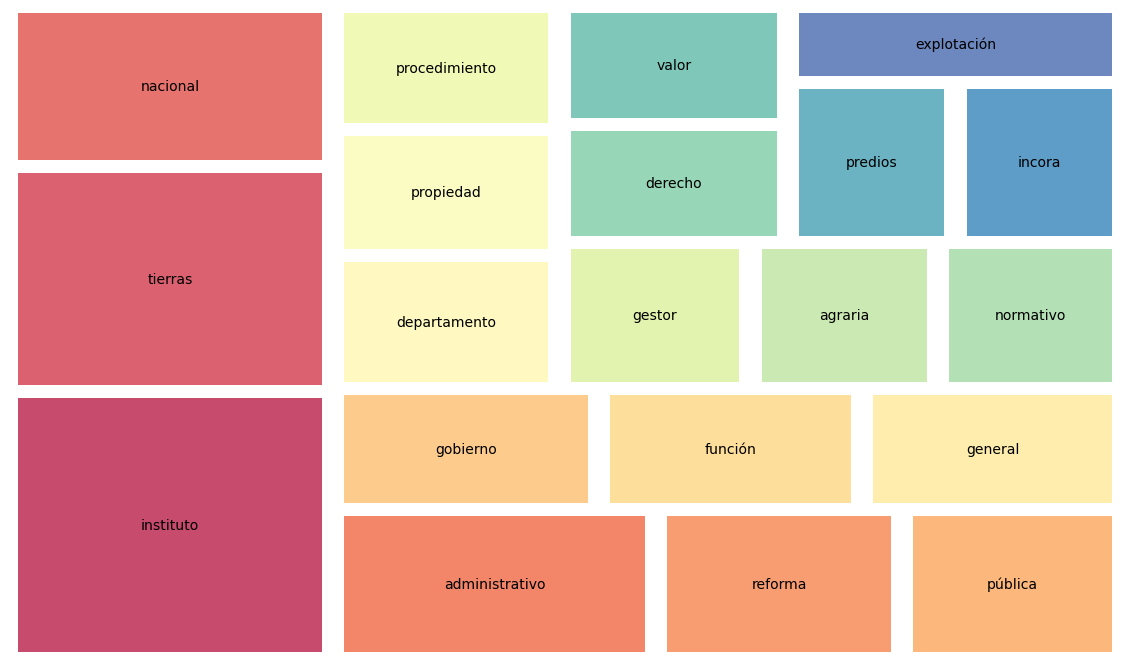

In [567]:
import squarify    # pip install squarify (algorithm for treemap)

squarify.plot(sizes=d_map['frecuencia'], label=d_map['Palabra'], alpha=.8,
              color=sns.color_palette("Spectral", 
                                     len(d_map)),pad=2,text_kwargs={'fontsize': 14})
plt.axis('off')
plt.show()

In [568]:
# From inspection of frequency distribution, make list of words of interest
not_of_interest = ['', 'artículo', 'ley', 'reforma', 'comisioacuten', 'decreto','artiacuteculo']

In [569]:
# Filter list of all tokens based on list of words of interst

tokens_of_interest = [w for w in alpha if w not in not_of_interest]
tokens_of_interest = [w for w in tokens_of_interest if w not in stopwords_esp]

tokens_of_interest

['decreta',
 'capítuloartículo',
 '1o',
 'presume',
 'baldíos',
 'sino',
 'propiedad',
 'privada',
 'fundos',
 'poseídos',
 'particulares',
 'entendiéndose',
 'dicha',
 'posesión',
 'consiste',
 'explotación',
 'económica',
 'suelo',
 'medio',
 'hechos',
 'positivos',
 'propios',
 'dueño',
 'plantacionessementeras',
 'ocupación',
 'ganadosotros',
 'igual',
 'significación',
 'económica',
 'cerramientola',
 'construcción',
 'edificios',
 'constituyen',
 'solos',
 'pruebas',
 'explotación',
 'económica',
 'pueden',
 'considerarse',
 'elementos',
 'complementarios',
 'presunción',
 'establece',
 'extiende',
 'tambiénlas',
 'porciones',
 'incultas',
 'cuya',
 'existencia',
 'demuestre',
 'necesaria',
 'explotación',
 'económica',
 'prediocomo',
 'complemento',
 'mejor',
 'aprovechamiento',
 'éste',
 'aunque',
 'terrenos',
 'trate',
 'continuidadpara',
 'ensanche',
 'misma',
 'explotación',
 'tales',
 'porciones',
 'pueden',
 'ser',
 'conjuntamente',
 'extensión',
 'igualla',
 'mitad',
 'ex

In [570]:
of_interest = ['paz','seguridad','educación','pobreza','desarrollo','empleo','trabajo','recursos','vida','social','inversión',\
 'equidad','tierra','redistribución','reforma','baldíos','posesión','plantaciones','ocupación','aprovechamiento','ganadería',\
 'explotación','ilegal','privado','público','instituto','derecho','agraria','propiedad','privado','privada','público',\
               'incora','predio','propietario','dominio','propietarios','índigenas','campesinos','igualdad','desigualdad',\
              'violación','terrenos','terreno','amortización','victima','victimas','violencia','conflicto','armado','extinción',\
              'expropiación','gobierno','agricultura','agraria','tierras','explotados','instituciones','institución','transformación',\
              "agricultura",'ganadería']

In [571]:
# Filter list of all tokens based on list of words of interest

tokens_of_interest = [w for w in all_tokens if w in of_interest]

In [572]:
# Join list in string

tokens_of_interest_str = ' '.join(tokens_of_interest)

In [573]:
# Write to txt file

with open('wordcloud/tokens_of_interest_str.txt',mode='w', encoding= 'utf-8') as f:
    f.write(tokens_of_interest_str)

In [574]:
freqdist = nltk.FreqDist(tokens_of_interest)
freqdist.most_common()

[('instituto', 497),
 ('tierras', 411),
 ('reforma', 254),
 ('derecho', 181),
 ('gobierno', 166),
 ('propiedad', 163),
 ('explotación', 154),
 ('desarrollo', 140),
 ('recursos', 128),
 ('incora', 116),
 ('propietario', 108),
 ('dominio', 101),
 ('predio', 98),
 ('agraria', 98),
 ('propietarios', 78),
 ('baldíos', 71),
 ('expropiación', 70),
 ('extinción', 69),
 ('social', 66),
 ('terrenos', 59),
 ('campesinos', 46),
 ('tierra', 38),
 ('terreno', 37),
 ('posesión', 34),
 ('ocupación', 33),
 ('trabajo', 28),
 ('público', 27),
 ('privada', 24),
 ('vida', 19),
 ('privado', 15),
 ('amortización', 15),
 ('violación', 15),
 ('inversión', 15),
 ('agricultura', 14),
 ('aprovechamiento', 13),
 ('paz', 12),
 ('explotados', 11),
 ('ganadería', 11),
 ('instituciones', 9),
 ('seguridad', 9),
 ('empleo', 8),
 ('educación', 7),
 ('plantaciones', 6),
 ('igualdad', 5),
 ('redistribución', 3),
 ('institución', 2),
 ('transformación', 2),
 ('violencia', 2),
 ('conflicto', 2),
 ('victimas', 1),
 ('equidad'

In [575]:
len(set(tokens_of_interest))

52

In [576]:
# Si queremos aplicar métodos de objetos nltk.text.Text:
tokens_nltk = nltk.Text(tokens_of_interest)
tokens_nltk

<Text: propiedad posesión explotación ocupación explotación explotación aprovechamiento terrenos...>

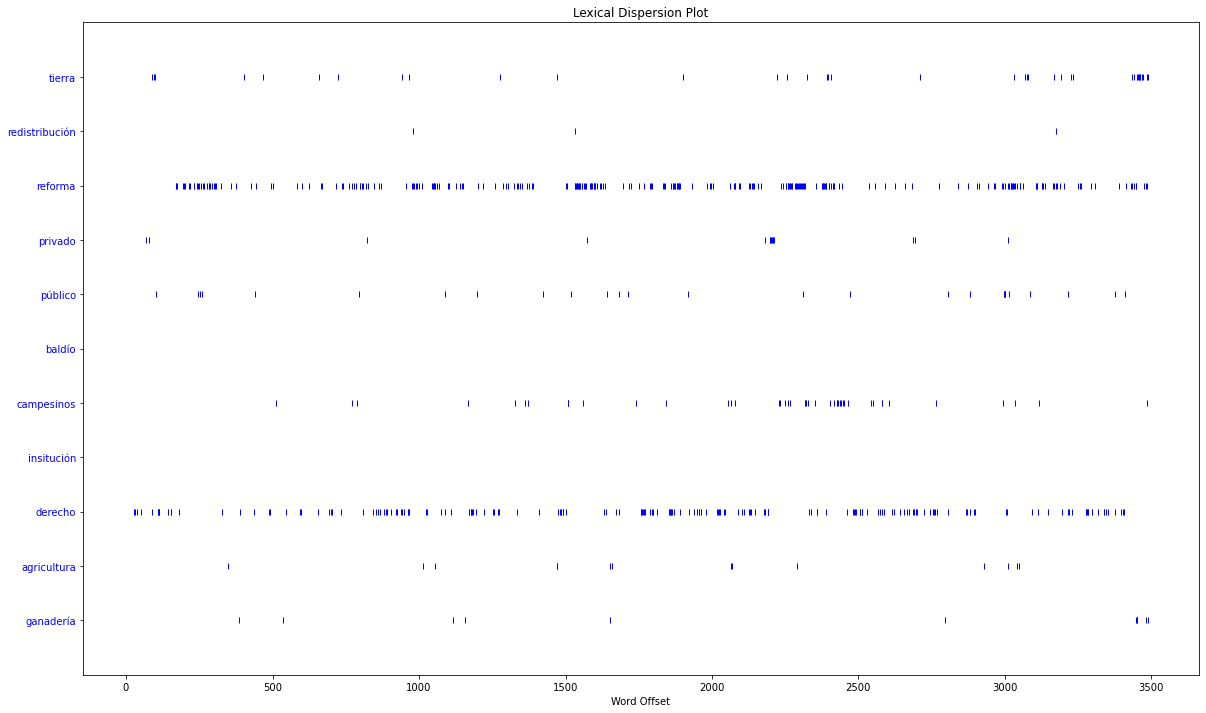

In [577]:
tokens_nltk.dispersion_plot(['tierra', "redistribución", "reforma", "privado","público","baldío","campesinos","insitución",\
                            "derecho",'agricultura','ganadería'])

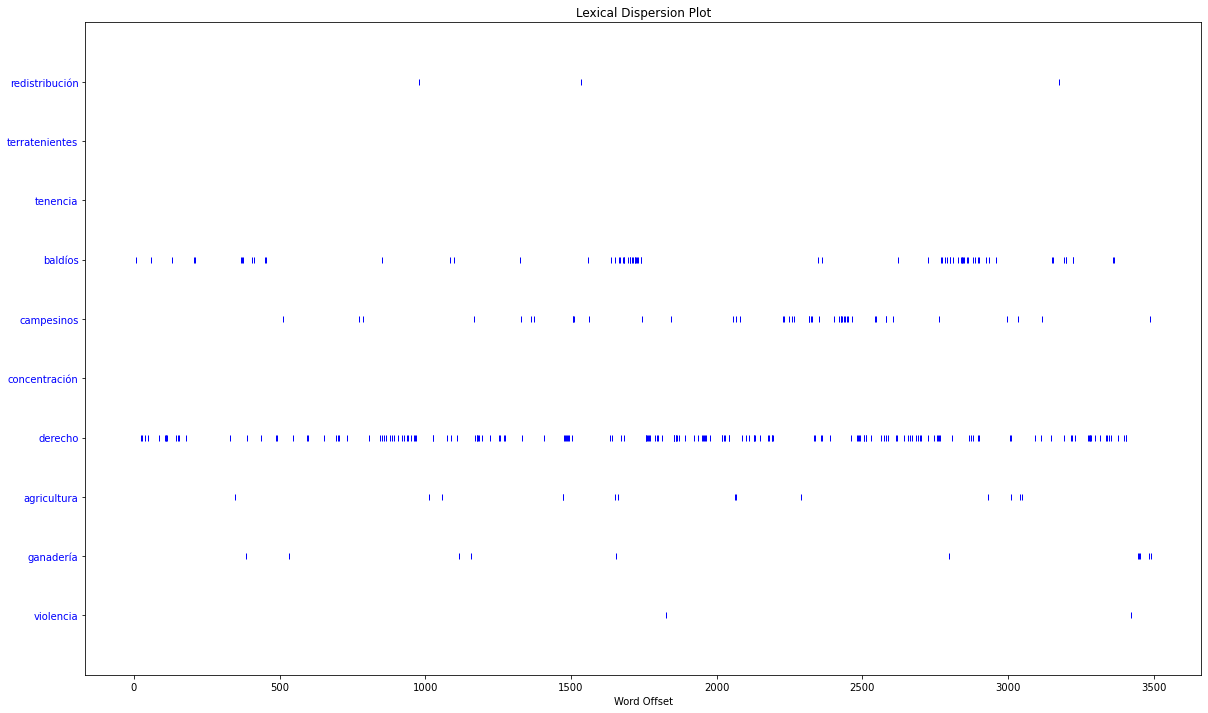

In [578]:
tokens_nltk.dispersion_plot(["redistribución", "terratenientes","tenencia","baldíos","campesinos","concentración",\
                            "derecho",'agricultura','ganadería','violencia'])

In [432]:
tokens_of_interest_str = ' '.join(tokens_of_interest)
tokens_of_interest_str

'propiedad posesión explotación ocupación explotación explotación aprovechamiento terrenos baldíos propiedad privada dominio propiedad privada terrenos dominio terreno propiedad privada terreno terreno dominio terreno propietario propiedad extinción derecho posesión extinción derecho dominio extinción extinción posesión predio extinción dominio extinción derecho dominio propiedad propiedad privada propiedad gobierno extinción dominio terreno dominio gobierno derecho tierras dominio tierras propietarios propiedad gobierno propiedad gobierno terrenos baldíos aprovechamiento terrenos propiedad desarrollo aprovechamiento dominio privado desarrollo explotación dominio tierras terrenos propiedad privada explotados terreno gobierno dominio privado terrenos plantaciones ocupación posesión tierras terreno tierras derecho predio terreno tierra explotación tierras tierras recursos tierra tierras educación instituciones gobierno tierra gobierno público tierras predio tierras tierras propiedad dere

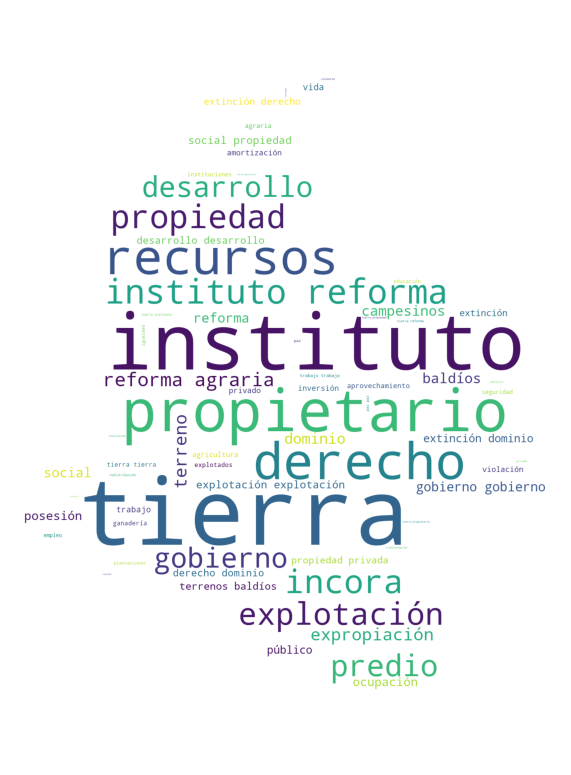

<Figure size 1440x1008 with 0 Axes>

In [579]:
# Based on https://github.com/amueller/word_cloud/blob/master/examples/masked.py
# Word cloud requirements
plt.rcParams["figure.figsize"] = [20.0, 14.0]
from os import path
from PIL import Image
from wordcloud import WordCloud, STOPWORDS

d = path.dirname('C:/Users/LENOVO/Desktop/ESTUDIO/Maestría en Economía-UROSARIO/Médotodos Computacionales para Políticas Públicas/PROYECTO/wordcloud/tokens_of_interest_str.txt')

# Read the whole text
text = open(path.join(d, 'tokens_of_interest_str.txt'),mode='r', encoding='utf-8').read()

# Read the mask image
# taken from http://www.zonu.com/images/0X0/2011-08-16-14306/Colombia-outline-map.jpg
colombia_mask = np.array(Image.open(path.join(d, "colombia.png")))

wc = WordCloud(background_color="white", max_words=500, mask=colombia_mask)

# Generate word cloud
wc.generate(text)

# Store to file
wc.to_file(path.join(d, "wordcloud.png"))

# Show

plt.imshow(wc)
plt.axis("off")
plt.figure()
#plt.imshow(colombia_mask, cmap=plt.cm.gray)
#plt.axis("off")
plt.show()

In [434]:
def col_counter(list_of_words, word):
    counter = Counter(w for w in list_of_words if w in word)
    return counter[word]

In [487]:
Reformas['tierra'] = [col_counter(Reformas['no_stopwords'][i], 'tierra') for i in range(len(Reformas['no_stopwords']))]
Reformas['redistribución'] = [col_counter(Reformas['no_stopwords'][i], 'redistribución') for i in range(len(Reformas['no_stopwords']))]
Reformas['restitución'] = [col_counter(Reformas['no_stopwords'][i], 'restitución') for i in range(len(Reformas['no_stopwords']))]
Reformas['agricultura'] = [col_counter(Reformas['no_stopwords'][i], 'agricultura') for i in range(len(Reformas['no_stopwords']))]
Reformas['campesinos'] = [col_counter(Reformas['no_stopwords'][i], 'campesinos') for i in range(len(Reformas['no_stopwords']))]
Reformas['violencia'] = [col_counter(Reformas['no_stopwords'][i], 'violencia') for i in range(len(Reformas['no_stopwords']))]
Reformas['ganadería'] = [col_counter(Reformas['no_stopwords'][i], 'ganadería') for i in range(len(Reformas['no_stopwords']))]
Reformas['baldíos'] = [col_counter(Reformas['no_stopwords'][i], 'baldíos') for i in range(len(Reformas['no_stopwords']))]

In [488]:
Reforma_g1=Reformas[['Fecha','restitución','tierra','agricultura','redistribución','violencia','ganadería','baldíos']]
Reforma_g1=pd.melt(Reforma_g1, id_vars =['Fecha'], value_vars =['restitución','tierra','agricultura','redistribución','violencia','ganadería','baldíos'])
#Reforma_g2=Reformas[['Fecha','restitución']]
#Reforma_g=pd.concat([Reforma_g1,Reforma_g2])

#Reforma_g

Text(0, 0.5, 'Año')

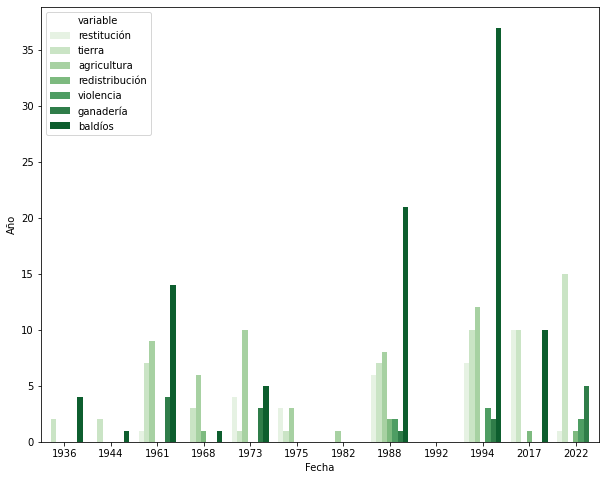

In [582]:
plt.rcParams["figure.figsize"] = [10.0, 8.0]
sns.barplot(data=Reforma_g1, x="Fecha", y="value", hue="variable",palette = "Greens")
plt.ylabel("Menciones")
plt.ylabel("Año")

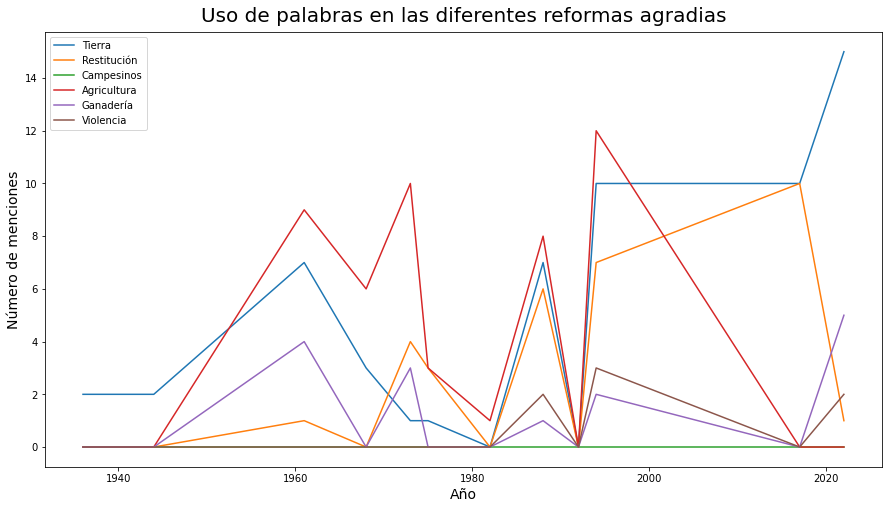

In [443]:
plt.rcParams["figure.figsize"] = [15.0, 8.0]
fig = plt.figure()
paz_by_month = Reformas['tierra']
terroristas_by_month = Reformas['restitución']
campesinos = Reformas['campesinos']
agricultura = Reformas['agricultura']
ganaderia = Reformas['ganadería']
violencia = Reformas['violencia']

plt.plot(Reformas['Fecha'],paz_by_month)
plt.plot(Reformas['Fecha'],terroristas_by_month)
plt.plot(Reformas['Fecha'],campesinos)
plt.plot(Reformas['Fecha'],agricultura)
plt.plot(Reformas['Fecha'],ganaderia)
plt.plot(Reformas['Fecha'],violencia)
ax = plt.gca()
ax.tick_params(axis='x')

plt.title("Uso de palabras en las diferentes reformas agradias", fontdict={'fontsize': 20,\
                                                                                'verticalalignment': 'bottom'})
plt.ylabel("Número de menciones", fontdict={'fontsize': 14})
plt.xlabel("Año", fontdict={'fontsize': 14})
plt.legend(['Tierra', 'Restitución','Campesinos','Agricultura','Ganadería','Violencia'], loc='upper left');


<AxesSubplot:xlabel='Fecha', ylabel='tierra'>

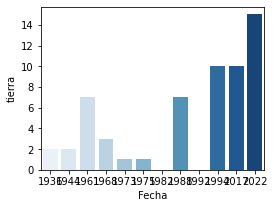

In [585]:
import seaborn as sns
plt.rcParams["figure.figsize"] = [4.0, 3.0]

#create scatterplot
sns.barplot(data=Reformas, x='Fecha', y='tierra',palette = "Blues")

<AxesSubplot:xlabel='Fecha', ylabel='restitución'>

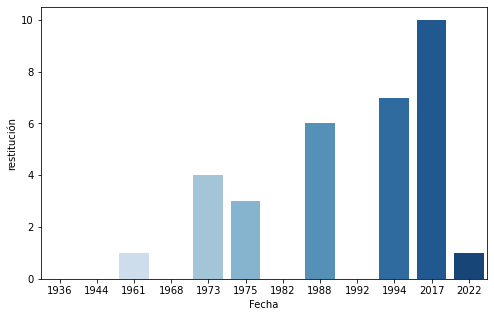

In [584]:
plt.rcParams["figure.figsize"] = [8.0, 5.0]
sns.barplot(data=Reformas, x='Fecha', y='restitución',palette = "Blues")

<AxesSubplot:xlabel='Fecha', ylabel='ganadería'>

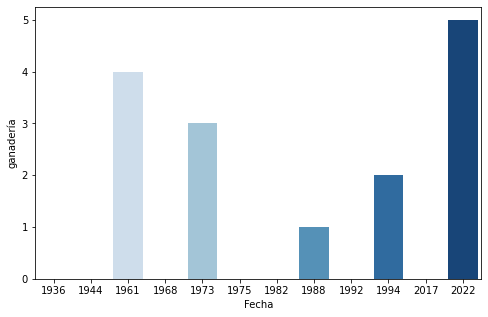

In [587]:
plt.rcParams["figure.figsize"] = [8.0, 5.0]
sns.barplot(data=Reformas, x='Fecha', y='ganadería',palette = "Blues")

<AxesSubplot:xlabel='Fecha', ylabel='agricultura'>

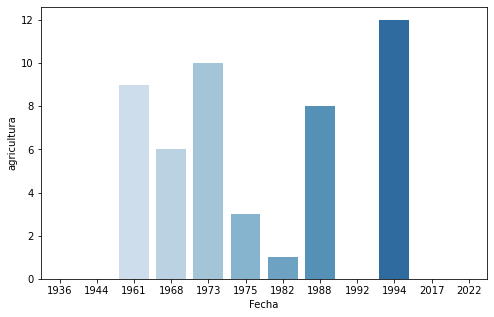

In [588]:
plt.rcParams["figure.figsize"] = [8.0, 5.0]
sns.barplot(data=Reformas, x='Fecha', y='agricultura',palette = "Blues")

<AxesSubplot:xlabel='Fecha', ylabel='violencia'>

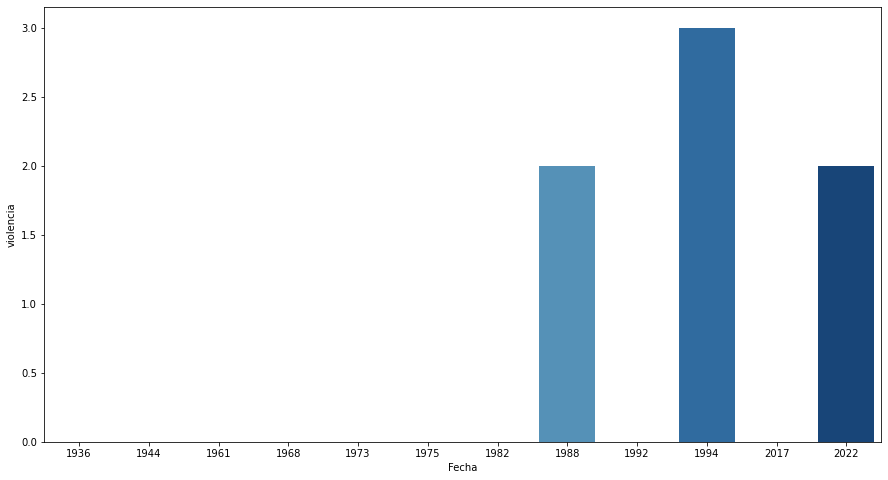

In [496]:
sns.barplot(data=Reformas, x='Fecha', y='violencia',palette = "Blues")